In [1]:
from datetime import datetime
from tqdm import tqdm
import importlib
import itertools
import os

import lib.utils.file_utils as FAUTL
import lib.utils.config_utils as CONUTL
import lib.visual.graph_visualizer as GRVIS
import lib.core.core as CORE

# Reload the modules
importlib.reload(FAUTL)
importlib.reload(CONUTL)
importlib.reload(GRVIS)
importlib.reload(CORE)

from lib.core.core import *


pygame 2.6.1 (SDL 2.28.4, Python 3.13.3)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
GAME_RULE = "V1"
######################################################
# Flag Parameters
######################################################
FLAG_DISTRIBUTION_CENTER = 5764607523034235417
# FLAG_DISTRIBUTION_CENTER = 0
FLAG_NUMBER = [1, 3, 5]
FLAG_DISTRIBUTION = {
    "uniform": [
        10,
    ],
}
######################################################
# Agent Parameters
######################################################
AGENT_NUMBER = [(1, 1), (2, 2), (5, 5), (10, 10)]

ATTACKER_DISTRIBUTION_CENTER = 8070450532247939950
# ATTACKER_DISTRIBUTION_CENTER = 0
ATTACKER_DISTRIBUTION = {
    "normal": [
        [20, 10],
    ],
}

DEFENDER_DISTRIBUTION_CENTER = 5764607523034235417
# DEFENDER_DISTRIBUTION_CENTER = 0
DEFENDER_DISTRIBUTION = {
    "normal": [
        [20, 10],
    ],
}   

GRAPH_DIR = os.path.join("data", "graphs")
DEFAULT_CONFIG_DIR = os.path.join("data", "default_config.yml")

# Get the date, hour and minute
now = datetime.now()
date_time = now.strftime("%m%d%H%M")

# Choose a specific graph rather than using all graphs
# selected_graph_name = "grid_graph_20x20_g.pkl"  # Modify this to your specific graph
selected_graph_name = "west_point_downsampled_N_ds3k.gml"  # Modify this to your specific graph
graph_identifier = selected_graph_name.split('_')[-1].split('.')[0]  # Extract the last identifier (152)

# Create main output directory with date and graph identifier
OUTPUT_DIR_BASE = os.path.join("data", "config", f"config_{date_time}_g{graph_identifier}")
os.makedirs(OUTPUT_DIR_BASE, exist_ok=False)
IMAGE_DIR_BASE = os.path.join("data", "image", f"image_{date_time}_g{graph_identifier}")
os.makedirs(IMAGE_DIR_BASE, exist_ok=False)

REPEAT = 5

In [3]:
loaded_graphs = {}
try:
    selected_graph = FAUTL.export_graph_generic(os.path.join(GRAPH_DIR, selected_graph_name))
    # Print all the nodes in the graph
    print(f"Nodes in the graph {selected_graph_name}: {list(selected_graph.nodes())}")
    
    
    loaded_graphs[selected_graph_name] = selected_graph
    info(f"Loaded graph: {selected_graph_name}")
except Exception as e:
    error(f"Failed to load graph {selected_graph_name}: {e}")
    exit(1)

if not loaded_graphs:
    error("No graph was loaded")
    exit(1)

num_graphs = len(loaded_graphs)
info(f"Using graph: {selected_graph_name}")
flag_combinations = len(FLAG_NUMBER) * sum(len(v) for v in FLAG_DISTRIBUTION.values())
info(f"Number of flag combinations: {flag_combinations}")
# attacker_combinations = len(AGENT_NUMBER) * sum(len(v) for v in ATTACKER_DISTRIBUTION.values())
# defender_combinations = len(AGENT_NUMBER) * sum(len(v) for v in DEFENDER_DISTRIBUTION.values())
# info(f"Number of attacker combinations: {attacker_combinations}")
# info(f"Number of defender combinations: {defender_combinations}")
agent_combinations = len(AGENT_NUMBER) * sum(len(v) for v in ATTACKER_DISTRIBUTION.values())

# Calculate total number of parameter combinations (excluding repeats)
# total_combinations = num_graphs * flag_combinations * attacker_combinations * defender_combinations
total_combinations = num_graphs * flag_combinations * agent_combinations
info(f"Total number of parameter combinations: {total_combinations}")
info(f"Total number of configurations (with repeats): {total_combinations * REPEAT}")

# Multiply by REPEAT to get total iterations/configurations
# total_iterations = num_graphs * flag_combinations * attacker_combinations * defender_combinations * REPEAT
total_iterations = num_graphs * flag_combinations * agent_combinations * REPEAT
info("Total number of combinations: {}".format(total_iterations))
info("Maximum total number of configurations: {}".format(total_iterations))

Nodes in the graph west_point_downsampled_N_ds3k.gml: [8070450532247942544, 5764607523034235284, 8070450532247941792, 8070450532247942118, 8070450532247933990, 8070450532247935299, 8070450532247933942, 8070450532247929131, 8070450532247935065, 8070450532247942688, 8070450532247934122, 5764607523034234891, 8070450532247935379, 8070450532247942401, 8070450532247929237, 8070450532247942380, 8070450532247935704, 8070450532247942438, 5764607523034236959, 8070450532247936288, 8070450532247935276, 8070450532247935899, 8070450532247942520, 5764607523034234904, 5764607523034234906, 8070450532247942164, 8070450532247935608, 8070450532247938192, 5764607523034237067, 8070450532247934896, 8070450532247936264, 8070450532247936292, 5764607523034234917, 8070450532247936330, 8070450532247936317, 8070450532247934924, 8070450532247936259, 8070450532247936248, 8070450532247936255, 8070450532247934840, 5764607523034234925, 8070450532247934964, 8070450532247934841, 8070450532247934973, 8070450532247935009, 

Generating Configurations:   0%|          | 0/60 [00:00<?, ?it/s]

[02:00:17.179][file_utils.py::read_yml_file] ✓ Success: Successfully loaded config from data/default_config.yml
[02:00:17.180][config_utils.py::recursive_update] ℹ Info: Key 'defaults' not found in original config. Adding with value: {'attacker_global': {'speed': 1, 'capture_radius': 2, 'sensors': ['map', 'agent', 'neighbor']}, 'defender_global': {'speed': 1, 'capture_radius': 1, 'sensors': ['map', 'agent', 'neighbor']}}
[02:00:17.180][config_utils.py::recursive_update] ℹ Info: Key 'visualization' not found in original config. Adding with value: {'window_size': [1980, 1080], 'game_speed': 2, 'draw_node_id': False, 'visualization_engine': 'PYGAME', 'colors': {'attacker_global': 'red', 'defender_global': 'blue', 'flag': 'green'}, 'sizes': {'flag_size': 10, 'global_agent_size': 10}}
[02:00:17.182][config_utils.py::generate_single_config] ✓ Success: Generated configuration: config_a1dbfd7b9e.yml
Renaming data/config/config_06060200_gds3k/F1A1D1_3ef96b/config_a1dbfd7b9e.yml to data/config/c

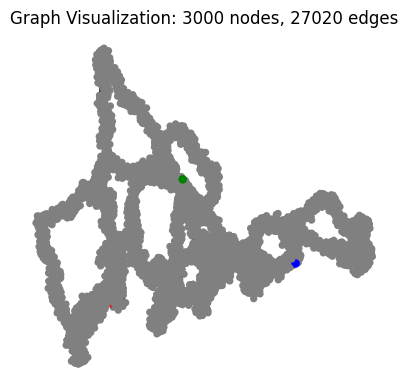

Generating Configurations:   2%|▏         | 1/60 [00:10<09:58, 10.15s/it]

[02:00:27.323][file_utils.py::read_yml_file] ✓ Success: Successfully loaded config from data/default_config.yml
[02:00:27.323][config_utils.py::recursive_update] ℹ Info: Key 'defaults' not found in original config. Adding with value: {'attacker_global': {'speed': 1, 'capture_radius': 2, 'sensors': ['map', 'agent', 'neighbor']}, 'defender_global': {'speed': 1, 'capture_radius': 1, 'sensors': ['map', 'agent', 'neighbor']}}
[02:00:27.323][config_utils.py::recursive_update] ℹ Info: Key 'visualization' not found in original config. Adding with value: {'window_size': [1980, 1080], 'game_speed': 2, 'draw_node_id': False, 'visualization_engine': 'PYGAME', 'colors': {'attacker_global': 'red', 'defender_global': 'blue', 'flag': 'green'}, 'sizes': {'flag_size': 10, 'global_agent_size': 10}}
[02:00:27.325][config_utils.py::generate_single_config] ✓ Success: Generated configuration: config_39bfe0bb16.yml
Renaming data/config/config_06060200_gds3k/F1A1D1_3ef96b/config_39bfe0bb16.yml to data/config/c

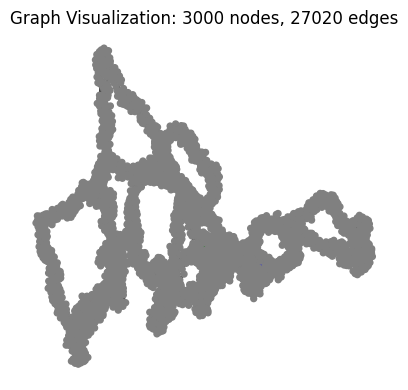

Generating Configurations:   3%|▎         | 2/60 [00:20<10:00, 10.35s/it]

[02:00:37.807][file_utils.py::read_yml_file] ✓ Success: Successfully loaded config from data/default_config.yml
[02:00:37.808][config_utils.py::recursive_update] ℹ Info: Key 'defaults' not found in original config. Adding with value: {'attacker_global': {'speed': 1, 'capture_radius': 2, 'sensors': ['map', 'agent', 'neighbor']}, 'defender_global': {'speed': 1, 'capture_radius': 1, 'sensors': ['map', 'agent', 'neighbor']}}
[02:00:37.808][config_utils.py::recursive_update] ℹ Info: Key 'visualization' not found in original config. Adding with value: {'window_size': [1980, 1080], 'game_speed': 2, 'draw_node_id': False, 'visualization_engine': 'PYGAME', 'colors': {'attacker_global': 'red', 'defender_global': 'blue', 'flag': 'green'}, 'sizes': {'flag_size': 10, 'global_agent_size': 10}}
[02:00:37.810][config_utils.py::generate_single_config] ✓ Success: Generated configuration: config_b36ac39796.yml
Renaming data/config/config_06060200_gds3k/F1A1D1_3ef96b/config_b36ac39796.yml to data/config/c

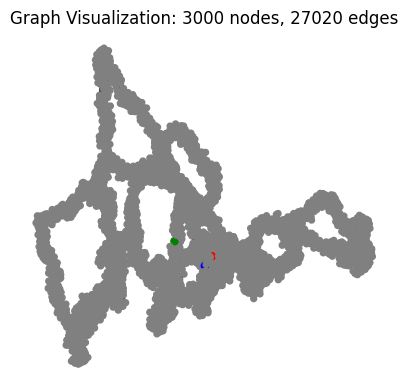

Generating Configurations:   5%|▌         | 3/60 [00:31<10:00, 10.54s/it]

[02:00:48.571][file_utils.py::read_yml_file] ✓ Success: Successfully loaded config from data/default_config.yml
[02:00:48.571][config_utils.py::recursive_update] ℹ Info: Key 'defaults' not found in original config. Adding with value: {'attacker_global': {'speed': 1, 'capture_radius': 2, 'sensors': ['map', 'agent', 'neighbor']}, 'defender_global': {'speed': 1, 'capture_radius': 1, 'sensors': ['map', 'agent', 'neighbor']}}
[02:00:48.572][config_utils.py::recursive_update] ℹ Info: Key 'visualization' not found in original config. Adding with value: {'window_size': [1980, 1080], 'game_speed': 2, 'draw_node_id': False, 'visualization_engine': 'PYGAME', 'colors': {'attacker_global': 'red', 'defender_global': 'blue', 'flag': 'green'}, 'sizes': {'flag_size': 10, 'global_agent_size': 10}}
[02:00:48.573][config_utils.py::generate_single_config] ✓ Success: Generated configuration: config_8af2983b8c.yml
Renaming data/config/config_06060200_gds3k/F1A1D1_3ef96b/config_8af2983b8c.yml to data/config/c

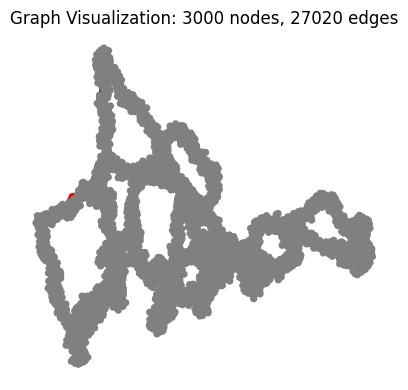

Generating Configurations:   7%|▋         | 4/60 [00:42<09:55, 10.63s/it]

[02:00:59.339][file_utils.py::read_yml_file] ✓ Success: Successfully loaded config from data/default_config.yml
[02:00:59.339][config_utils.py::recursive_update] ℹ Info: Key 'defaults' not found in original config. Adding with value: {'attacker_global': {'speed': 1, 'capture_radius': 2, 'sensors': ['map', 'agent', 'neighbor']}, 'defender_global': {'speed': 1, 'capture_radius': 1, 'sensors': ['map', 'agent', 'neighbor']}}
[02:00:59.339][config_utils.py::recursive_update] ℹ Info: Key 'visualization' not found in original config. Adding with value: {'window_size': [1980, 1080], 'game_speed': 2, 'draw_node_id': False, 'visualization_engine': 'PYGAME', 'colors': {'attacker_global': 'red', 'defender_global': 'blue', 'flag': 'green'}, 'sizes': {'flag_size': 10, 'global_agent_size': 10}}
[02:00:59.341][config_utils.py::generate_single_config] ✓ Success: Generated configuration: config_55b0be36c2.yml
Renaming data/config/config_06060200_gds3k/F1A1D1_3ef96b/config_55b0be36c2.yml to data/config/c

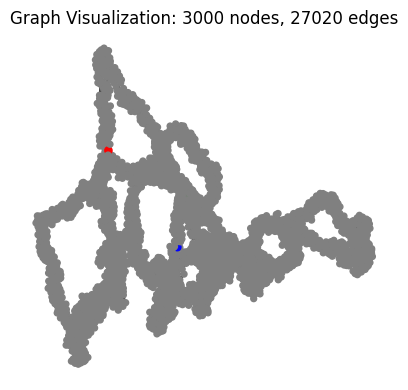

Generating Configurations:   8%|▊         | 5/60 [00:52<09:45, 10.65s/it]

[02:01:10.020][file_utils.py::read_yml_file] ✓ Success: Successfully loaded config from data/default_config.yml
[02:01:10.020][config_utils.py::recursive_update] ℹ Info: Key 'defaults' not found in original config. Adding with value: {'attacker_global': {'speed': 1, 'capture_radius': 2, 'sensors': ['map', 'agent', 'neighbor']}, 'defender_global': {'speed': 1, 'capture_radius': 1, 'sensors': ['map', 'agent', 'neighbor']}}
[02:01:10.020][config_utils.py::recursive_update] ℹ Info: Key 'visualization' not found in original config. Adding with value: {'window_size': [1980, 1080], 'game_speed': 2, 'draw_node_id': False, 'visualization_engine': 'PYGAME', 'colors': {'attacker_global': 'red', 'defender_global': 'blue', 'flag': 'green'}, 'sizes': {'flag_size': 10, 'global_agent_size': 10}}
[02:01:10.022][config_utils.py::generate_single_config] ✓ Success: Generated configuration: config_24cecf6319.yml
Renaming data/config/config_06060200_gds3k/F1A2D2_28f772/config_24cecf6319.yml to data/config/c

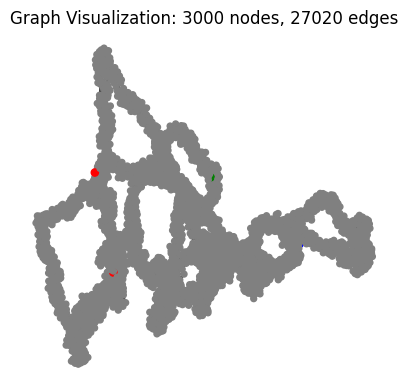

Generating Configurations:  10%|█         | 6/60 [01:03<09:34, 10.65s/it]

[02:01:20.668][file_utils.py::read_yml_file] ✓ Success: Successfully loaded config from data/default_config.yml
[02:01:20.668][config_utils.py::recursive_update] ℹ Info: Key 'defaults' not found in original config. Adding with value: {'attacker_global': {'speed': 1, 'capture_radius': 2, 'sensors': ['map', 'agent', 'neighbor']}, 'defender_global': {'speed': 1, 'capture_radius': 1, 'sensors': ['map', 'agent', 'neighbor']}}
[02:01:20.669][config_utils.py::recursive_update] ℹ Info: Key 'visualization' not found in original config. Adding with value: {'window_size': [1980, 1080], 'game_speed': 2, 'draw_node_id': False, 'visualization_engine': 'PYGAME', 'colors': {'attacker_global': 'red', 'defender_global': 'blue', 'flag': 'green'}, 'sizes': {'flag_size': 10, 'global_agent_size': 10}}
[02:01:20.670][config_utils.py::generate_single_config] ✓ Success: Generated configuration: config_75c1173ed7.yml
Renaming data/config/config_06060200_gds3k/F1A2D2_28f772/config_75c1173ed7.yml to data/config/c

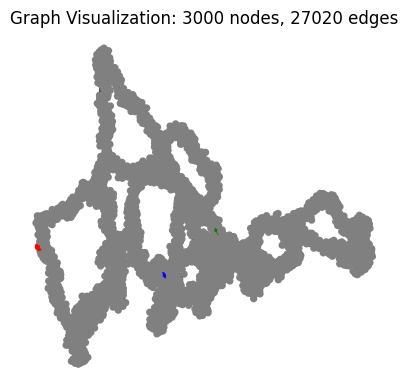

Generating Configurations:  12%|█▏        | 7/60 [01:14<09:22, 10.62s/it]

[02:01:31.223][file_utils.py::read_yml_file] ✓ Success: Successfully loaded config from data/default_config.yml
[02:01:31.224][config_utils.py::recursive_update] ℹ Info: Key 'defaults' not found in original config. Adding with value: {'attacker_global': {'speed': 1, 'capture_radius': 2, 'sensors': ['map', 'agent', 'neighbor']}, 'defender_global': {'speed': 1, 'capture_radius': 1, 'sensors': ['map', 'agent', 'neighbor']}}
[02:01:31.224][config_utils.py::recursive_update] ℹ Info: Key 'visualization' not found in original config. Adding with value: {'window_size': [1980, 1080], 'game_speed': 2, 'draw_node_id': False, 'visualization_engine': 'PYGAME', 'colors': {'attacker_global': 'red', 'defender_global': 'blue', 'flag': 'green'}, 'sizes': {'flag_size': 10, 'global_agent_size': 10}}
[02:01:31.226][config_utils.py::generate_single_config] ✓ Success: Generated configuration: config_52f77637ec.yml
Renaming data/config/config_06060200_gds3k/F1A2D2_28f772/config_52f77637ec.yml to data/config/c

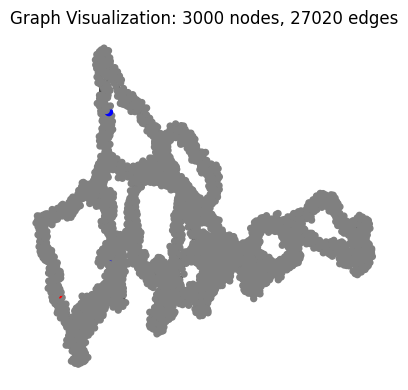

Generating Configurations:  13%|█▎        | 8/60 [01:24<09:11, 10.60s/it]

[02:01:41.775][file_utils.py::read_yml_file] ✓ Success: Successfully loaded config from data/default_config.yml
[02:01:41.775][config_utils.py::recursive_update] ℹ Info: Key 'defaults' not found in original config. Adding with value: {'attacker_global': {'speed': 1, 'capture_radius': 2, 'sensors': ['map', 'agent', 'neighbor']}, 'defender_global': {'speed': 1, 'capture_radius': 1, 'sensors': ['map', 'agent', 'neighbor']}}
[02:01:41.775][config_utils.py::recursive_update] ℹ Info: Key 'visualization' not found in original config. Adding with value: {'window_size': [1980, 1080], 'game_speed': 2, 'draw_node_id': False, 'visualization_engine': 'PYGAME', 'colors': {'attacker_global': 'red', 'defender_global': 'blue', 'flag': 'green'}, 'sizes': {'flag_size': 10, 'global_agent_size': 10}}
[02:01:41.777][config_utils.py::generate_single_config] ✓ Success: Generated configuration: config_ba2b8a2aac.yml
Renaming data/config/config_06060200_gds3k/F1A2D2_28f772/config_ba2b8a2aac.yml to data/config/c

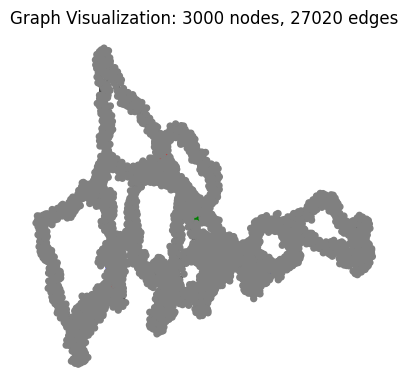

Generating Configurations:  15%|█▌        | 9/60 [01:35<08:59, 10.58s/it]

[02:01:52.319][file_utils.py::read_yml_file] ✓ Success: Successfully loaded config from data/default_config.yml
[02:01:52.320][config_utils.py::recursive_update] ℹ Info: Key 'defaults' not found in original config. Adding with value: {'attacker_global': {'speed': 1, 'capture_radius': 2, 'sensors': ['map', 'agent', 'neighbor']}, 'defender_global': {'speed': 1, 'capture_radius': 1, 'sensors': ['map', 'agent', 'neighbor']}}
[02:01:52.320][config_utils.py::recursive_update] ℹ Info: Key 'visualization' not found in original config. Adding with value: {'window_size': [1980, 1080], 'game_speed': 2, 'draw_node_id': False, 'visualization_engine': 'PYGAME', 'colors': {'attacker_global': 'red', 'defender_global': 'blue', 'flag': 'green'}, 'sizes': {'flag_size': 10, 'global_agent_size': 10}}
[02:01:52.322][config_utils.py::generate_single_config] ✓ Success: Generated configuration: config_009070eb7a.yml
Renaming data/config/config_06060200_gds3k/F1A2D2_28f772/config_009070eb7a.yml to data/config/c

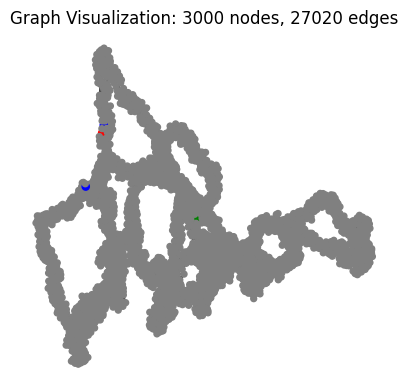

Generating Configurations:  17%|█▋        | 10/60 [01:45<08:49, 10.60s/it]

[02:02:02.962][file_utils.py::read_yml_file] ✓ Success: Successfully loaded config from data/default_config.yml
[02:02:02.962][config_utils.py::recursive_update] ℹ Info: Key 'defaults' not found in original config. Adding with value: {'attacker_global': {'speed': 1, 'capture_radius': 2, 'sensors': ['map', 'agent', 'neighbor']}, 'defender_global': {'speed': 1, 'capture_radius': 1, 'sensors': ['map', 'agent', 'neighbor']}}
[02:02:02.962][config_utils.py::recursive_update] ℹ Info: Key 'visualization' not found in original config. Adding with value: {'window_size': [1980, 1080], 'game_speed': 2, 'draw_node_id': False, 'visualization_engine': 'PYGAME', 'colors': {'attacker_global': 'red', 'defender_global': 'blue', 'flag': 'green'}, 'sizes': {'flag_size': 10, 'global_agent_size': 10}}
[02:02:02.964][config_utils.py::generate_single_config] ✓ Success: Generated configuration: config_b4049d1de9.yml
Renaming data/config/config_06060200_gds3k/F1A5D5_f43fc2/config_b4049d1de9.yml to data/config/c

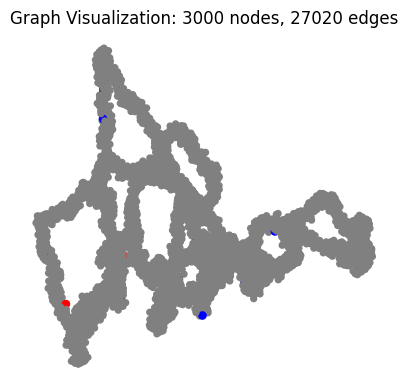

Generating Configurations:  18%|█▊        | 11/60 [01:56<08:39, 10.60s/it]

[02:02:13.557][file_utils.py::read_yml_file] ✓ Success: Successfully loaded config from data/default_config.yml
[02:02:13.557][config_utils.py::recursive_update] ℹ Info: Key 'defaults' not found in original config. Adding with value: {'attacker_global': {'speed': 1, 'capture_radius': 2, 'sensors': ['map', 'agent', 'neighbor']}, 'defender_global': {'speed': 1, 'capture_radius': 1, 'sensors': ['map', 'agent', 'neighbor']}}
[02:02:13.557][config_utils.py::recursive_update] ℹ Info: Key 'visualization' not found in original config. Adding with value: {'window_size': [1980, 1080], 'game_speed': 2, 'draw_node_id': False, 'visualization_engine': 'PYGAME', 'colors': {'attacker_global': 'red', 'defender_global': 'blue', 'flag': 'green'}, 'sizes': {'flag_size': 10, 'global_agent_size': 10}}
[02:02:13.559][config_utils.py::generate_single_config] ✓ Success: Generated configuration: config_8a599b9bda.yml
Renaming data/config/config_06060200_gds3k/F1A5D5_f43fc2/config_8a599b9bda.yml to data/config/c

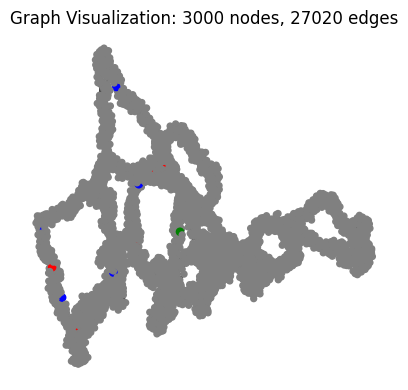

Generating Configurations:  20%|██        | 12/60 [02:07<08:30, 10.63s/it]

[02:02:24.262][file_utils.py::read_yml_file] ✓ Success: Successfully loaded config from data/default_config.yml
[02:02:24.262][config_utils.py::recursive_update] ℹ Info: Key 'defaults' not found in original config. Adding with value: {'attacker_global': {'speed': 1, 'capture_radius': 2, 'sensors': ['map', 'agent', 'neighbor']}, 'defender_global': {'speed': 1, 'capture_radius': 1, 'sensors': ['map', 'agent', 'neighbor']}}
[02:02:24.262][config_utils.py::recursive_update] ℹ Info: Key 'visualization' not found in original config. Adding with value: {'window_size': [1980, 1080], 'game_speed': 2, 'draw_node_id': False, 'visualization_engine': 'PYGAME', 'colors': {'attacker_global': 'red', 'defender_global': 'blue', 'flag': 'green'}, 'sizes': {'flag_size': 10, 'global_agent_size': 10}}
[02:02:24.265][config_utils.py::generate_single_config] ✓ Success: Generated configuration: config_5933967a31.yml
Renaming data/config/config_06060200_gds3k/F1A5D5_f43fc2/config_5933967a31.yml to data/config/c

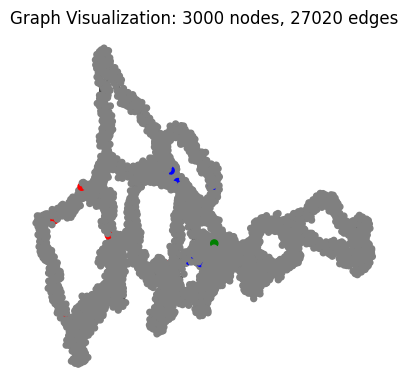

Generating Configurations:  22%|██▏       | 13/60 [02:17<08:20, 10.64s/it]

[02:02:34.938][file_utils.py::read_yml_file] ✓ Success: Successfully loaded config from data/default_config.yml
[02:02:34.938][config_utils.py::recursive_update] ℹ Info: Key 'defaults' not found in original config. Adding with value: {'attacker_global': {'speed': 1, 'capture_radius': 2, 'sensors': ['map', 'agent', 'neighbor']}, 'defender_global': {'speed': 1, 'capture_radius': 1, 'sensors': ['map', 'agent', 'neighbor']}}
[02:02:34.938][config_utils.py::recursive_update] ℹ Info: Key 'visualization' not found in original config. Adding with value: {'window_size': [1980, 1080], 'game_speed': 2, 'draw_node_id': False, 'visualization_engine': 'PYGAME', 'colors': {'attacker_global': 'red', 'defender_global': 'blue', 'flag': 'green'}, 'sizes': {'flag_size': 10, 'global_agent_size': 10}}
[02:02:34.940][config_utils.py::generate_single_config] ✓ Success: Generated configuration: config_16932e0fd6.yml
Renaming data/config/config_06060200_gds3k/F1A5D5_f43fc2/config_16932e0fd6.yml to data/config/c

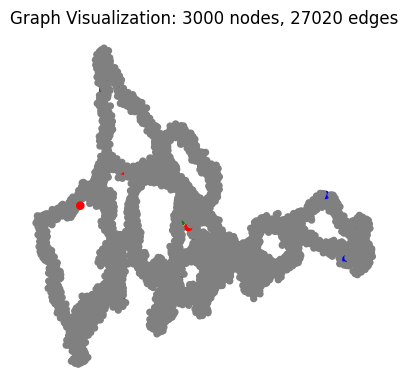

Generating Configurations:  23%|██▎       | 14/60 [02:28<08:08, 10.61s/it]

[02:02:45.474][file_utils.py::read_yml_file] ✓ Success: Successfully loaded config from data/default_config.yml
[02:02:45.474][config_utils.py::recursive_update] ℹ Info: Key 'defaults' not found in original config. Adding with value: {'attacker_global': {'speed': 1, 'capture_radius': 2, 'sensors': ['map', 'agent', 'neighbor']}, 'defender_global': {'speed': 1, 'capture_radius': 1, 'sensors': ['map', 'agent', 'neighbor']}}
[02:02:45.474][config_utils.py::recursive_update] ℹ Info: Key 'visualization' not found in original config. Adding with value: {'window_size': [1980, 1080], 'game_speed': 2, 'draw_node_id': False, 'visualization_engine': 'PYGAME', 'colors': {'attacker_global': 'red', 'defender_global': 'blue', 'flag': 'green'}, 'sizes': {'flag_size': 10, 'global_agent_size': 10}}
[02:02:45.476][config_utils.py::generate_single_config] ✓ Success: Generated configuration: config_accbd231d9.yml
Renaming data/config/config_06060200_gds3k/F1A5D5_f43fc2/config_accbd231d9.yml to data/config/c

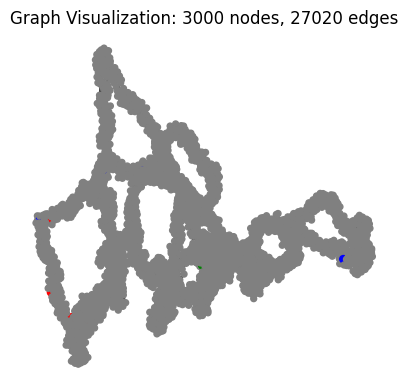

Generating Configurations:  25%|██▌       | 15/60 [02:38<07:56, 10.60s/it]

[02:02:56.035][file_utils.py::read_yml_file] ✓ Success: Successfully loaded config from data/default_config.yml
[02:02:56.035][config_utils.py::recursive_update] ℹ Info: Key 'defaults' not found in original config. Adding with value: {'attacker_global': {'speed': 1, 'capture_radius': 2, 'sensors': ['map', 'agent', 'neighbor']}, 'defender_global': {'speed': 1, 'capture_radius': 1, 'sensors': ['map', 'agent', 'neighbor']}}
[02:02:56.035][config_utils.py::recursive_update] ℹ Info: Key 'visualization' not found in original config. Adding with value: {'window_size': [1980, 1080], 'game_speed': 2, 'draw_node_id': False, 'visualization_engine': 'PYGAME', 'colors': {'attacker_global': 'red', 'defender_global': 'blue', 'flag': 'green'}, 'sizes': {'flag_size': 10, 'global_agent_size': 10}}
[02:02:56.037][config_utils.py::generate_single_config] ✓ Success: Generated configuration: config_cb0360cf5a.yml
Renaming data/config/config_06060200_gds3k/F1A10D10_95a59a/config_cb0360cf5a.yml to data/config

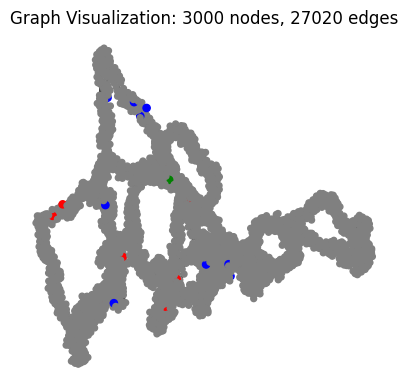

Generating Configurations:  27%|██▋       | 16/60 [02:49<07:46, 10.60s/it]

[02:03:06.644][file_utils.py::read_yml_file] ✓ Success: Successfully loaded config from data/default_config.yml
[02:03:06.645][config_utils.py::recursive_update] ℹ Info: Key 'defaults' not found in original config. Adding with value: {'attacker_global': {'speed': 1, 'capture_radius': 2, 'sensors': ['map', 'agent', 'neighbor']}, 'defender_global': {'speed': 1, 'capture_radius': 1, 'sensors': ['map', 'agent', 'neighbor']}}
[02:03:06.645][config_utils.py::recursive_update] ℹ Info: Key 'visualization' not found in original config. Adding with value: {'window_size': [1980, 1080], 'game_speed': 2, 'draw_node_id': False, 'visualization_engine': 'PYGAME', 'colors': {'attacker_global': 'red', 'defender_global': 'blue', 'flag': 'green'}, 'sizes': {'flag_size': 10, 'global_agent_size': 10}}
[02:03:06.647][config_utils.py::generate_single_config] ✓ Success: Generated configuration: config_7dd829678f.yml
Renaming data/config/config_06060200_gds3k/F1A10D10_95a59a/config_7dd829678f.yml to data/config

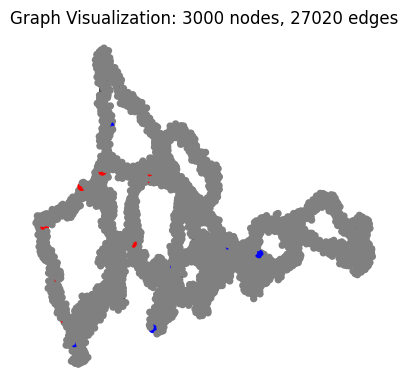

Generating Configurations:  28%|██▊       | 17/60 [03:00<07:37, 10.65s/it]

[02:03:17.408][file_utils.py::read_yml_file] ✓ Success: Successfully loaded config from data/default_config.yml
[02:03:17.408][config_utils.py::recursive_update] ℹ Info: Key 'defaults' not found in original config. Adding with value: {'attacker_global': {'speed': 1, 'capture_radius': 2, 'sensors': ['map', 'agent', 'neighbor']}, 'defender_global': {'speed': 1, 'capture_radius': 1, 'sensors': ['map', 'agent', 'neighbor']}}
[02:03:17.408][config_utils.py::recursive_update] ℹ Info: Key 'visualization' not found in original config. Adding with value: {'window_size': [1980, 1080], 'game_speed': 2, 'draw_node_id': False, 'visualization_engine': 'PYGAME', 'colors': {'attacker_global': 'red', 'defender_global': 'blue', 'flag': 'green'}, 'sizes': {'flag_size': 10, 'global_agent_size': 10}}
[02:03:17.411][config_utils.py::generate_single_config] ✓ Success: Generated configuration: config_a8eeab7142.yml
Renaming data/config/config_06060200_gds3k/F1A10D10_95a59a/config_a8eeab7142.yml to data/config

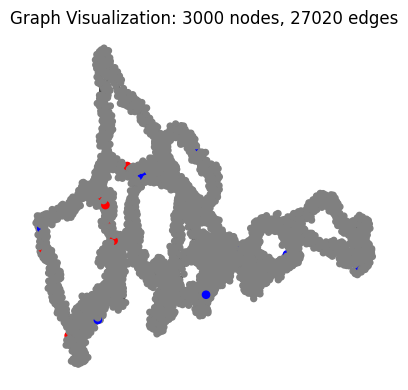

Generating Configurations:  30%|███       | 18/60 [03:10<07:26, 10.62s/it]

[02:03:27.975][file_utils.py::read_yml_file] ✓ Success: Successfully loaded config from data/default_config.yml
[02:03:27.975][config_utils.py::recursive_update] ℹ Info: Key 'defaults' not found in original config. Adding with value: {'attacker_global': {'speed': 1, 'capture_radius': 2, 'sensors': ['map', 'agent', 'neighbor']}, 'defender_global': {'speed': 1, 'capture_radius': 1, 'sensors': ['map', 'agent', 'neighbor']}}
[02:03:27.976][config_utils.py::recursive_update] ℹ Info: Key 'visualization' not found in original config. Adding with value: {'window_size': [1980, 1080], 'game_speed': 2, 'draw_node_id': False, 'visualization_engine': 'PYGAME', 'colors': {'attacker_global': 'red', 'defender_global': 'blue', 'flag': 'green'}, 'sizes': {'flag_size': 10, 'global_agent_size': 10}}
[02:03:27.978][config_utils.py::generate_single_config] ✓ Success: Generated configuration: config_28f5b525ec.yml
Renaming data/config/config_06060200_gds3k/F1A10D10_95a59a/config_28f5b525ec.yml to data/config

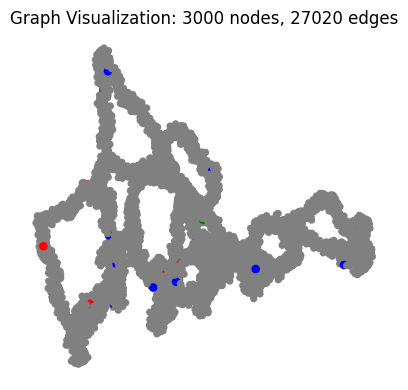

Generating Configurations:  32%|███▏      | 19/60 [03:21<07:15, 10.61s/it]

[02:03:38.553][file_utils.py::read_yml_file] ✓ Success: Successfully loaded config from data/default_config.yml
[02:03:38.553][config_utils.py::recursive_update] ℹ Info: Key 'defaults' not found in original config. Adding with value: {'attacker_global': {'speed': 1, 'capture_radius': 2, 'sensors': ['map', 'agent', 'neighbor']}, 'defender_global': {'speed': 1, 'capture_radius': 1, 'sensors': ['map', 'agent', 'neighbor']}}
[02:03:38.553][config_utils.py::recursive_update] ℹ Info: Key 'visualization' not found in original config. Adding with value: {'window_size': [1980, 1080], 'game_speed': 2, 'draw_node_id': False, 'visualization_engine': 'PYGAME', 'colors': {'attacker_global': 'red', 'defender_global': 'blue', 'flag': 'green'}, 'sizes': {'flag_size': 10, 'global_agent_size': 10}}
[02:03:38.556][config_utils.py::generate_single_config] ✓ Success: Generated configuration: config_d63f3dbca8.yml
Renaming data/config/config_06060200_gds3k/F1A10D10_95a59a/config_d63f3dbca8.yml to data/config

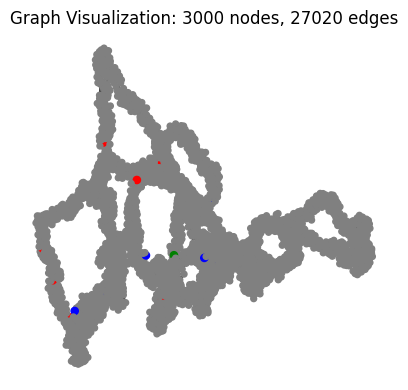

Generating Configurations:  33%|███▎      | 20/60 [03:32<07:06, 10.65s/it]

[02:03:49.299][file_utils.py::read_yml_file] ✓ Success: Successfully loaded config from data/default_config.yml
[02:03:49.299][config_utils.py::recursive_update] ℹ Info: Key 'defaults' not found in original config. Adding with value: {'attacker_global': {'speed': 1, 'capture_radius': 2, 'sensors': ['map', 'agent', 'neighbor']}, 'defender_global': {'speed': 1, 'capture_radius': 1, 'sensors': ['map', 'agent', 'neighbor']}}
[02:03:49.299][config_utils.py::recursive_update] ℹ Info: Key 'visualization' not found in original config. Adding with value: {'window_size': [1980, 1080], 'game_speed': 2, 'draw_node_id': False, 'visualization_engine': 'PYGAME', 'colors': {'attacker_global': 'red', 'defender_global': 'blue', 'flag': 'green'}, 'sizes': {'flag_size': 10, 'global_agent_size': 10}}
[02:03:49.301][config_utils.py::generate_single_config] ✓ Success: Generated configuration: config_1ac28a6fd9.yml
Renaming data/config/config_06060200_gds3k/F3A1D1_f4c2cb/config_1ac28a6fd9.yml to data/config/c

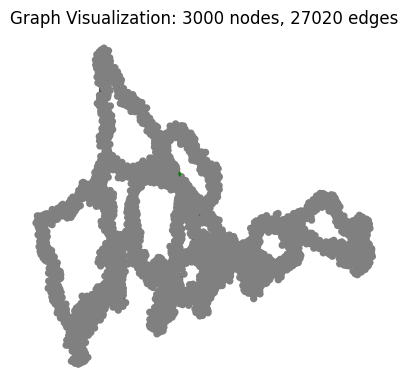

Generating Configurations:  35%|███▌      | 21/60 [03:42<06:56, 10.69s/it]

[02:04:00.075][file_utils.py::read_yml_file] ✓ Success: Successfully loaded config from data/default_config.yml
[02:04:00.076][config_utils.py::recursive_update] ℹ Info: Key 'defaults' not found in original config. Adding with value: {'attacker_global': {'speed': 1, 'capture_radius': 2, 'sensors': ['map', 'agent', 'neighbor']}, 'defender_global': {'speed': 1, 'capture_radius': 1, 'sensors': ['map', 'agent', 'neighbor']}}
[02:04:00.076][config_utils.py::recursive_update] ℹ Info: Key 'visualization' not found in original config. Adding with value: {'window_size': [1980, 1080], 'game_speed': 2, 'draw_node_id': False, 'visualization_engine': 'PYGAME', 'colors': {'attacker_global': 'red', 'defender_global': 'blue', 'flag': 'green'}, 'sizes': {'flag_size': 10, 'global_agent_size': 10}}
[02:04:00.078][config_utils.py::generate_single_config] ✓ Success: Generated configuration: config_b83ec4f334.yml
Renaming data/config/config_06060200_gds3k/F3A1D1_f4c2cb/config_b83ec4f334.yml to data/config/c

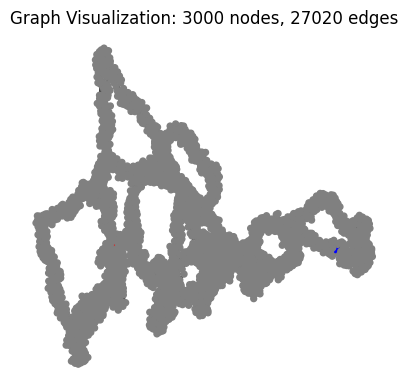

Generating Configurations:  37%|███▋      | 22/60 [03:53<06:48, 10.76s/it]

[02:04:10.990][file_utils.py::read_yml_file] ✓ Success: Successfully loaded config from data/default_config.yml
[02:04:10.990][config_utils.py::recursive_update] ℹ Info: Key 'defaults' not found in original config. Adding with value: {'attacker_global': {'speed': 1, 'capture_radius': 2, 'sensors': ['map', 'agent', 'neighbor']}, 'defender_global': {'speed': 1, 'capture_radius': 1, 'sensors': ['map', 'agent', 'neighbor']}}
[02:04:10.991][config_utils.py::recursive_update] ℹ Info: Key 'visualization' not found in original config. Adding with value: {'window_size': [1980, 1080], 'game_speed': 2, 'draw_node_id': False, 'visualization_engine': 'PYGAME', 'colors': {'attacker_global': 'red', 'defender_global': 'blue', 'flag': 'green'}, 'sizes': {'flag_size': 10, 'global_agent_size': 10}}
[02:04:10.992][config_utils.py::generate_single_config] ✓ Success: Generated configuration: config_932e4144cc.yml
Renaming data/config/config_06060200_gds3k/F3A1D1_f4c2cb/config_932e4144cc.yml to data/config/c

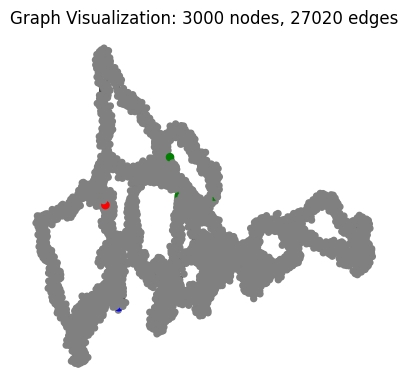

Generating Configurations:  38%|███▊      | 23/60 [04:04<06:34, 10.66s/it]

[02:04:21.429][file_utils.py::read_yml_file] ✓ Success: Successfully loaded config from data/default_config.yml
[02:04:21.429][config_utils.py::recursive_update] ℹ Info: Key 'defaults' not found in original config. Adding with value: {'attacker_global': {'speed': 1, 'capture_radius': 2, 'sensors': ['map', 'agent', 'neighbor']}, 'defender_global': {'speed': 1, 'capture_radius': 1, 'sensors': ['map', 'agent', 'neighbor']}}
[02:04:21.430][config_utils.py::recursive_update] ℹ Info: Key 'visualization' not found in original config. Adding with value: {'window_size': [1980, 1080], 'game_speed': 2, 'draw_node_id': False, 'visualization_engine': 'PYGAME', 'colors': {'attacker_global': 'red', 'defender_global': 'blue', 'flag': 'green'}, 'sizes': {'flag_size': 10, 'global_agent_size': 10}}
[02:04:21.431][config_utils.py::generate_single_config] ✓ Success: Generated configuration: config_4ee598f77d.yml
Renaming data/config/config_06060200_gds3k/F3A1D1_f4c2cb/config_4ee598f77d.yml to data/config/c

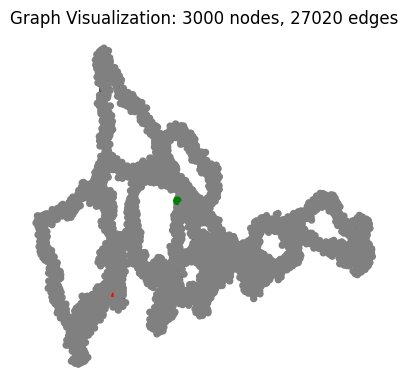

Generating Configurations:  40%|████      | 24/60 [04:14<06:23, 10.64s/it]

[02:04:32.030][file_utils.py::read_yml_file] ✓ Success: Successfully loaded config from data/default_config.yml
[02:04:32.030][config_utils.py::recursive_update] ℹ Info: Key 'defaults' not found in original config. Adding with value: {'attacker_global': {'speed': 1, 'capture_radius': 2, 'sensors': ['map', 'agent', 'neighbor']}, 'defender_global': {'speed': 1, 'capture_radius': 1, 'sensors': ['map', 'agent', 'neighbor']}}
[02:04:32.030][config_utils.py::recursive_update] ℹ Info: Key 'visualization' not found in original config. Adding with value: {'window_size': [1980, 1080], 'game_speed': 2, 'draw_node_id': False, 'visualization_engine': 'PYGAME', 'colors': {'attacker_global': 'red', 'defender_global': 'blue', 'flag': 'green'}, 'sizes': {'flag_size': 10, 'global_agent_size': 10}}
[02:04:32.032][config_utils.py::generate_single_config] ✓ Success: Generated configuration: config_ee195e42ce.yml
Renaming data/config/config_06060200_gds3k/F3A1D1_f4c2cb/config_ee195e42ce.yml to data/config/c

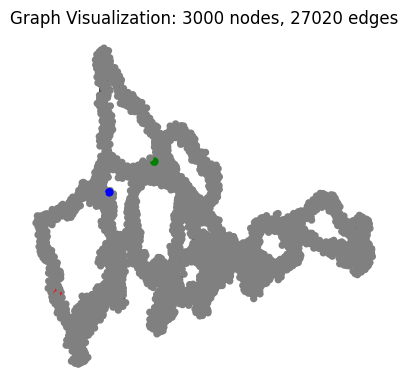

Generating Configurations:  42%|████▏     | 25/60 [04:25<06:11, 10.63s/it]

[02:04:42.616][file_utils.py::read_yml_file] ✓ Success: Successfully loaded config from data/default_config.yml
[02:04:42.616][config_utils.py::recursive_update] ℹ Info: Key 'defaults' not found in original config. Adding with value: {'attacker_global': {'speed': 1, 'capture_radius': 2, 'sensors': ['map', 'agent', 'neighbor']}, 'defender_global': {'speed': 1, 'capture_radius': 1, 'sensors': ['map', 'agent', 'neighbor']}}
[02:04:42.616][config_utils.py::recursive_update] ℹ Info: Key 'visualization' not found in original config. Adding with value: {'window_size': [1980, 1080], 'game_speed': 2, 'draw_node_id': False, 'visualization_engine': 'PYGAME', 'colors': {'attacker_global': 'red', 'defender_global': 'blue', 'flag': 'green'}, 'sizes': {'flag_size': 10, 'global_agent_size': 10}}
[02:04:42.618][config_utils.py::generate_single_config] ✓ Success: Generated configuration: config_85e6e1cf2d.yml
Renaming data/config/config_06060200_gds3k/F3A2D2_fddf58/config_85e6e1cf2d.yml to data/config/c

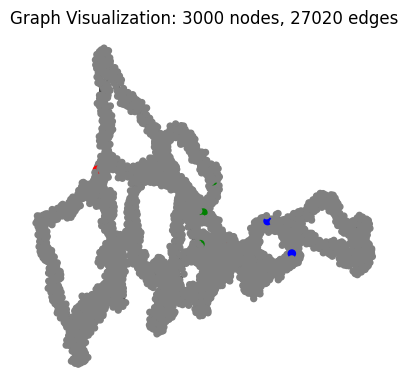

Generating Configurations:  43%|████▎     | 26/60 [04:35<05:59, 10.57s/it]

[02:04:53.057][file_utils.py::read_yml_file] ✓ Success: Successfully loaded config from data/default_config.yml
[02:04:53.058][config_utils.py::recursive_update] ℹ Info: Key 'defaults' not found in original config. Adding with value: {'attacker_global': {'speed': 1, 'capture_radius': 2, 'sensors': ['map', 'agent', 'neighbor']}, 'defender_global': {'speed': 1, 'capture_radius': 1, 'sensors': ['map', 'agent', 'neighbor']}}
[02:04:53.058][config_utils.py::recursive_update] ℹ Info: Key 'visualization' not found in original config. Adding with value: {'window_size': [1980, 1080], 'game_speed': 2, 'draw_node_id': False, 'visualization_engine': 'PYGAME', 'colors': {'attacker_global': 'red', 'defender_global': 'blue', 'flag': 'green'}, 'sizes': {'flag_size': 10, 'global_agent_size': 10}}
[02:04:53.060][config_utils.py::generate_single_config] ✓ Success: Generated configuration: config_d5bc8081b9.yml
Renaming data/config/config_06060200_gds3k/F3A2D2_fddf58/config_d5bc8081b9.yml to data/config/c

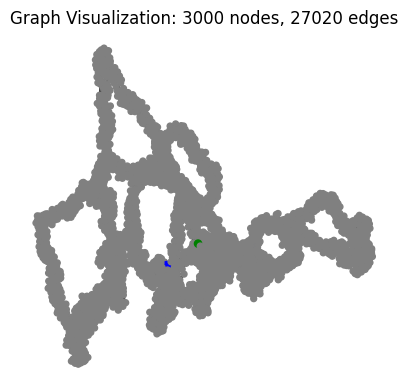

Generating Configurations:  45%|████▌     | 27/60 [04:46<05:48, 10.56s/it]

[02:05:03.589][file_utils.py::read_yml_file] ✓ Success: Successfully loaded config from data/default_config.yml
[02:05:03.590][config_utils.py::recursive_update] ℹ Info: Key 'defaults' not found in original config. Adding with value: {'attacker_global': {'speed': 1, 'capture_radius': 2, 'sensors': ['map', 'agent', 'neighbor']}, 'defender_global': {'speed': 1, 'capture_radius': 1, 'sensors': ['map', 'agent', 'neighbor']}}
[02:05:03.590][config_utils.py::recursive_update] ℹ Info: Key 'visualization' not found in original config. Adding with value: {'window_size': [1980, 1080], 'game_speed': 2, 'draw_node_id': False, 'visualization_engine': 'PYGAME', 'colors': {'attacker_global': 'red', 'defender_global': 'blue', 'flag': 'green'}, 'sizes': {'flag_size': 10, 'global_agent_size': 10}}
[02:05:03.592][config_utils.py::generate_single_config] ✓ Success: Generated configuration: config_f7d96f269e.yml
Renaming data/config/config_06060200_gds3k/F3A2D2_fddf58/config_f7d96f269e.yml to data/config/c

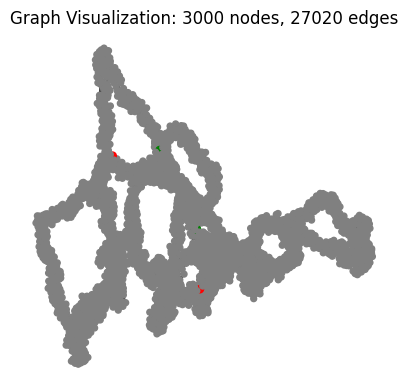

Generating Configurations:  47%|████▋     | 28/60 [04:57<05:38, 10.58s/it]

[02:05:14.233][file_utils.py::read_yml_file] ✓ Success: Successfully loaded config from data/default_config.yml
[02:05:14.234][config_utils.py::recursive_update] ℹ Info: Key 'defaults' not found in original config. Adding with value: {'attacker_global': {'speed': 1, 'capture_radius': 2, 'sensors': ['map', 'agent', 'neighbor']}, 'defender_global': {'speed': 1, 'capture_radius': 1, 'sensors': ['map', 'agent', 'neighbor']}}
[02:05:14.234][config_utils.py::recursive_update] ℹ Info: Key 'visualization' not found in original config. Adding with value: {'window_size': [1980, 1080], 'game_speed': 2, 'draw_node_id': False, 'visualization_engine': 'PYGAME', 'colors': {'attacker_global': 'red', 'defender_global': 'blue', 'flag': 'green'}, 'sizes': {'flag_size': 10, 'global_agent_size': 10}}
[02:05:14.236][config_utils.py::generate_single_config] ✓ Success: Generated configuration: config_870d3923cf.yml
Renaming data/config/config_06060200_gds3k/F3A2D2_fddf58/config_870d3923cf.yml to data/config/c

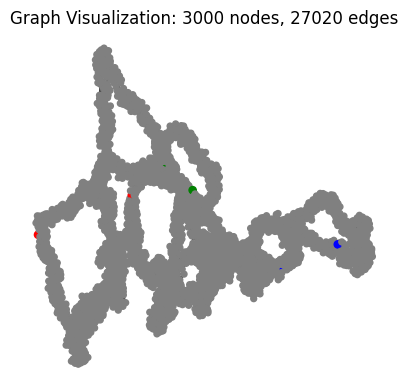

Generating Configurations:  48%|████▊     | 29/60 [05:07<05:28, 10.60s/it]

[02:05:24.871][file_utils.py::read_yml_file] ✓ Success: Successfully loaded config from data/default_config.yml
[02:05:24.871][config_utils.py::recursive_update] ℹ Info: Key 'defaults' not found in original config. Adding with value: {'attacker_global': {'speed': 1, 'capture_radius': 2, 'sensors': ['map', 'agent', 'neighbor']}, 'defender_global': {'speed': 1, 'capture_radius': 1, 'sensors': ['map', 'agent', 'neighbor']}}
[02:05:24.871][config_utils.py::recursive_update] ℹ Info: Key 'visualization' not found in original config. Adding with value: {'window_size': [1980, 1080], 'game_speed': 2, 'draw_node_id': False, 'visualization_engine': 'PYGAME', 'colors': {'attacker_global': 'red', 'defender_global': 'blue', 'flag': 'green'}, 'sizes': {'flag_size': 10, 'global_agent_size': 10}}
[02:05:24.873][config_utils.py::generate_single_config] ✓ Success: Generated configuration: config_5c8f515c6c.yml
Renaming data/config/config_06060200_gds3k/F3A2D2_fddf58/config_5c8f515c6c.yml to data/config/c

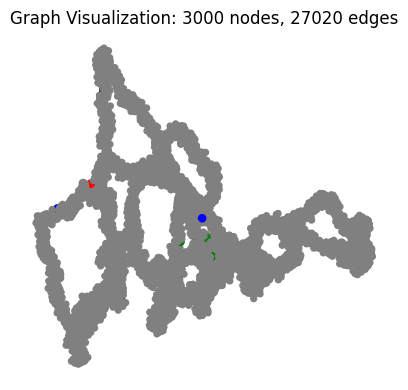

Generating Configurations:  50%|█████     | 30/60 [05:18<05:19, 10.65s/it]

[02:05:35.650][file_utils.py::read_yml_file] ✓ Success: Successfully loaded config from data/default_config.yml
[02:05:35.651][config_utils.py::recursive_update] ℹ Info: Key 'defaults' not found in original config. Adding with value: {'attacker_global': {'speed': 1, 'capture_radius': 2, 'sensors': ['map', 'agent', 'neighbor']}, 'defender_global': {'speed': 1, 'capture_radius': 1, 'sensors': ['map', 'agent', 'neighbor']}}
[02:05:35.651][config_utils.py::recursive_update] ℹ Info: Key 'visualization' not found in original config. Adding with value: {'window_size': [1980, 1080], 'game_speed': 2, 'draw_node_id': False, 'visualization_engine': 'PYGAME', 'colors': {'attacker_global': 'red', 'defender_global': 'blue', 'flag': 'green'}, 'sizes': {'flag_size': 10, 'global_agent_size': 10}}
[02:05:35.653][config_utils.py::generate_single_config] ✓ Success: Generated configuration: config_07e99639ba.yml
Renaming data/config/config_06060200_gds3k/F3A5D5_57570d/config_07e99639ba.yml to data/config/c

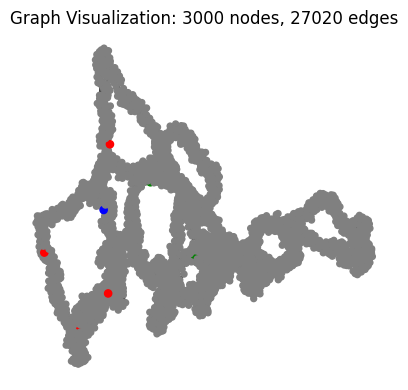

Generating Configurations:  52%|█████▏    | 31/60 [05:29<05:08, 10.64s/it]

[02:05:46.256][file_utils.py::read_yml_file] ✓ Success: Successfully loaded config from data/default_config.yml
[02:05:46.256][config_utils.py::recursive_update] ℹ Info: Key 'defaults' not found in original config. Adding with value: {'attacker_global': {'speed': 1, 'capture_radius': 2, 'sensors': ['map', 'agent', 'neighbor']}, 'defender_global': {'speed': 1, 'capture_radius': 1, 'sensors': ['map', 'agent', 'neighbor']}}
[02:05:46.256][config_utils.py::recursive_update] ℹ Info: Key 'visualization' not found in original config. Adding with value: {'window_size': [1980, 1080], 'game_speed': 2, 'draw_node_id': False, 'visualization_engine': 'PYGAME', 'colors': {'attacker_global': 'red', 'defender_global': 'blue', 'flag': 'green'}, 'sizes': {'flag_size': 10, 'global_agent_size': 10}}
[02:05:46.259][config_utils.py::generate_single_config] ✓ Success: Generated configuration: config_1ac45bfe97.yml
Renaming data/config/config_06060200_gds3k/F3A5D5_57570d/config_1ac45bfe97.yml to data/config/c

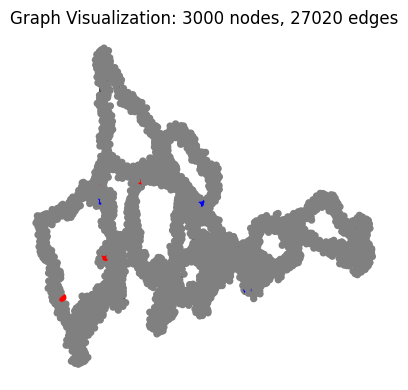

Generating Configurations:  53%|█████▎    | 32/60 [05:39<04:56, 10.59s/it]

[02:05:56.742][file_utils.py::read_yml_file] ✓ Success: Successfully loaded config from data/default_config.yml
[02:05:56.743][config_utils.py::recursive_update] ℹ Info: Key 'defaults' not found in original config. Adding with value: {'attacker_global': {'speed': 1, 'capture_radius': 2, 'sensors': ['map', 'agent', 'neighbor']}, 'defender_global': {'speed': 1, 'capture_radius': 1, 'sensors': ['map', 'agent', 'neighbor']}}
[02:05:56.743][config_utils.py::recursive_update] ℹ Info: Key 'visualization' not found in original config. Adding with value: {'window_size': [1980, 1080], 'game_speed': 2, 'draw_node_id': False, 'visualization_engine': 'PYGAME', 'colors': {'attacker_global': 'red', 'defender_global': 'blue', 'flag': 'green'}, 'sizes': {'flag_size': 10, 'global_agent_size': 10}}
[02:05:56.745][config_utils.py::generate_single_config] ✓ Success: Generated configuration: config_c452bcdf7f.yml
Renaming data/config/config_06060200_gds3k/F3A5D5_57570d/config_c452bcdf7f.yml to data/config/c

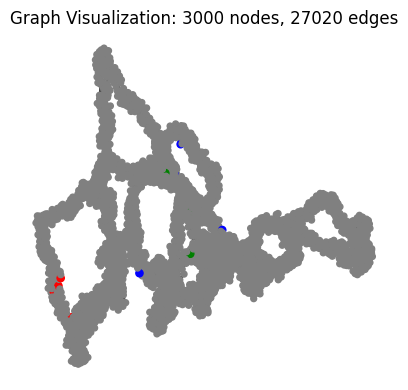

Generating Configurations:  55%|█████▌    | 33/60 [05:50<04:44, 10.55s/it]

[02:06:07.194][file_utils.py::read_yml_file] ✓ Success: Successfully loaded config from data/default_config.yml
[02:06:07.194][config_utils.py::recursive_update] ℹ Info: Key 'defaults' not found in original config. Adding with value: {'attacker_global': {'speed': 1, 'capture_radius': 2, 'sensors': ['map', 'agent', 'neighbor']}, 'defender_global': {'speed': 1, 'capture_radius': 1, 'sensors': ['map', 'agent', 'neighbor']}}
[02:06:07.195][config_utils.py::recursive_update] ℹ Info: Key 'visualization' not found in original config. Adding with value: {'window_size': [1980, 1080], 'game_speed': 2, 'draw_node_id': False, 'visualization_engine': 'PYGAME', 'colors': {'attacker_global': 'red', 'defender_global': 'blue', 'flag': 'green'}, 'sizes': {'flag_size': 10, 'global_agent_size': 10}}
[02:06:07.197][config_utils.py::generate_single_config] ✓ Success: Generated configuration: config_9f085a8826.yml
Renaming data/config/config_06060200_gds3k/F3A5D5_57570d/config_9f085a8826.yml to data/config/c

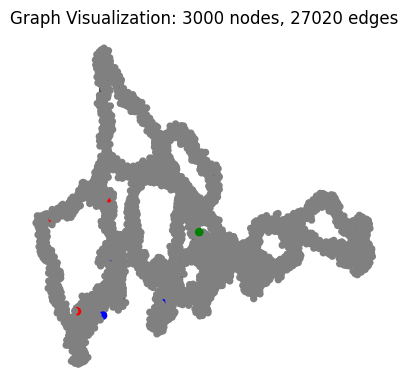

Generating Configurations:  57%|█████▋    | 34/60 [06:00<04:32, 10.49s/it]

[02:06:17.533][file_utils.py::read_yml_file] ✓ Success: Successfully loaded config from data/default_config.yml
[02:06:17.533][config_utils.py::recursive_update] ℹ Info: Key 'defaults' not found in original config. Adding with value: {'attacker_global': {'speed': 1, 'capture_radius': 2, 'sensors': ['map', 'agent', 'neighbor']}, 'defender_global': {'speed': 1, 'capture_radius': 1, 'sensors': ['map', 'agent', 'neighbor']}}
[02:06:17.533][config_utils.py::recursive_update] ℹ Info: Key 'visualization' not found in original config. Adding with value: {'window_size': [1980, 1080], 'game_speed': 2, 'draw_node_id': False, 'visualization_engine': 'PYGAME', 'colors': {'attacker_global': 'red', 'defender_global': 'blue', 'flag': 'green'}, 'sizes': {'flag_size': 10, 'global_agent_size': 10}}
[02:06:17.535][config_utils.py::generate_single_config] ✓ Success: Generated configuration: config_29981e4d96.yml
Renaming data/config/config_06060200_gds3k/F3A5D5_57570d/config_29981e4d96.yml to data/config/c

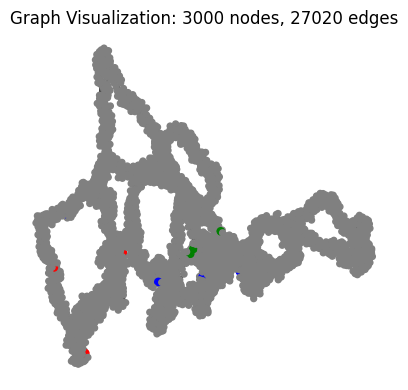

Generating Configurations:  58%|█████▊    | 35/60 [06:10<04:22, 10.50s/it]

[02:06:28.073][file_utils.py::read_yml_file] ✓ Success: Successfully loaded config from data/default_config.yml
[02:06:28.074][config_utils.py::recursive_update] ℹ Info: Key 'defaults' not found in original config. Adding with value: {'attacker_global': {'speed': 1, 'capture_radius': 2, 'sensors': ['map', 'agent', 'neighbor']}, 'defender_global': {'speed': 1, 'capture_radius': 1, 'sensors': ['map', 'agent', 'neighbor']}}
[02:06:28.074][config_utils.py::recursive_update] ℹ Info: Key 'visualization' not found in original config. Adding with value: {'window_size': [1980, 1080], 'game_speed': 2, 'draw_node_id': False, 'visualization_engine': 'PYGAME', 'colors': {'attacker_global': 'red', 'defender_global': 'blue', 'flag': 'green'}, 'sizes': {'flag_size': 10, 'global_agent_size': 10}}
[02:06:28.077][config_utils.py::generate_single_config] ✓ Success: Generated configuration: config_7b37db054e.yml
Renaming data/config/config_06060200_gds3k/F3A10D10_7f9ad9/config_7b37db054e.yml to data/config

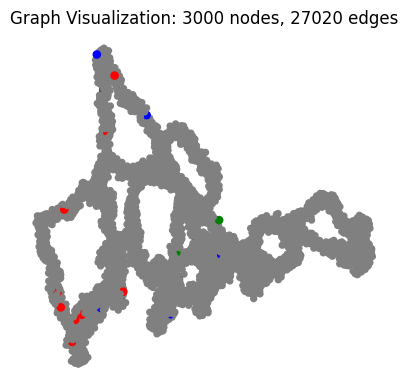

Generating Configurations:  60%|██████    | 36/60 [06:21<04:12, 10.52s/it]

[02:06:38.630][file_utils.py::read_yml_file] ✓ Success: Successfully loaded config from data/default_config.yml
[02:06:38.630][config_utils.py::recursive_update] ℹ Info: Key 'defaults' not found in original config. Adding with value: {'attacker_global': {'speed': 1, 'capture_radius': 2, 'sensors': ['map', 'agent', 'neighbor']}, 'defender_global': {'speed': 1, 'capture_radius': 1, 'sensors': ['map', 'agent', 'neighbor']}}
[02:06:38.631][config_utils.py::recursive_update] ℹ Info: Key 'visualization' not found in original config. Adding with value: {'window_size': [1980, 1080], 'game_speed': 2, 'draw_node_id': False, 'visualization_engine': 'PYGAME', 'colors': {'attacker_global': 'red', 'defender_global': 'blue', 'flag': 'green'}, 'sizes': {'flag_size': 10, 'global_agent_size': 10}}
[02:06:38.634][config_utils.py::generate_single_config] ✓ Success: Generated configuration: config_95f54c2503.yml
Renaming data/config/config_06060200_gds3k/F3A10D10_7f9ad9/config_95f54c2503.yml to data/config

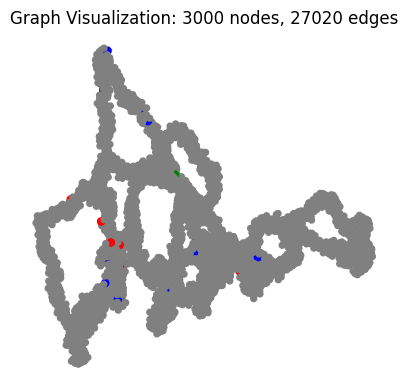

Generating Configurations:  62%|██████▏   | 37/60 [06:31<04:01, 10.50s/it]

[02:06:49.074][file_utils.py::read_yml_file] ✓ Success: Successfully loaded config from data/default_config.yml
[02:06:49.075][config_utils.py::recursive_update] ℹ Info: Key 'defaults' not found in original config. Adding with value: {'attacker_global': {'speed': 1, 'capture_radius': 2, 'sensors': ['map', 'agent', 'neighbor']}, 'defender_global': {'speed': 1, 'capture_radius': 1, 'sensors': ['map', 'agent', 'neighbor']}}
[02:06:49.075][config_utils.py::recursive_update] ℹ Info: Key 'visualization' not found in original config. Adding with value: {'window_size': [1980, 1080], 'game_speed': 2, 'draw_node_id': False, 'visualization_engine': 'PYGAME', 'colors': {'attacker_global': 'red', 'defender_global': 'blue', 'flag': 'green'}, 'sizes': {'flag_size': 10, 'global_agent_size': 10}}
[02:06:49.078][config_utils.py::generate_single_config] ✓ Success: Generated configuration: config_8f0295a7b2.yml
Renaming data/config/config_06060200_gds3k/F3A10D10_7f9ad9/config_8f0295a7b2.yml to data/config

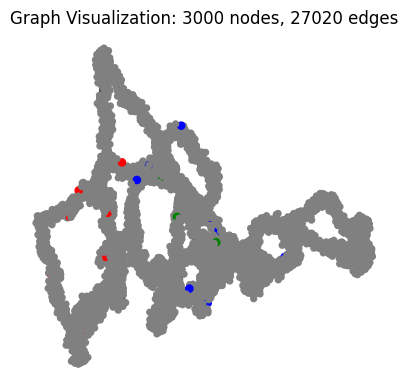

Generating Configurations:  63%|██████▎   | 38/60 [06:42<03:52, 10.57s/it]

[02:06:59.813][file_utils.py::read_yml_file] ✓ Success: Successfully loaded config from data/default_config.yml
[02:06:59.814][config_utils.py::recursive_update] ℹ Info: Key 'defaults' not found in original config. Adding with value: {'attacker_global': {'speed': 1, 'capture_radius': 2, 'sensors': ['map', 'agent', 'neighbor']}, 'defender_global': {'speed': 1, 'capture_radius': 1, 'sensors': ['map', 'agent', 'neighbor']}}
[02:06:59.814][config_utils.py::recursive_update] ℹ Info: Key 'visualization' not found in original config. Adding with value: {'window_size': [1980, 1080], 'game_speed': 2, 'draw_node_id': False, 'visualization_engine': 'PYGAME', 'colors': {'attacker_global': 'red', 'defender_global': 'blue', 'flag': 'green'}, 'sizes': {'flag_size': 10, 'global_agent_size': 10}}
[02:06:59.817][config_utils.py::generate_single_config] ✓ Success: Generated configuration: config_f73472f353.yml
Renaming data/config/config_06060200_gds3k/F3A10D10_7f9ad9/config_f73472f353.yml to data/config

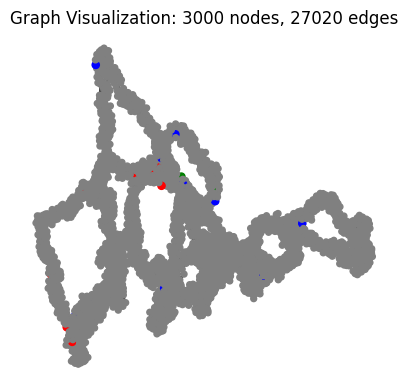

Generating Configurations:  65%|██████▌   | 39/60 [06:52<03:40, 10.49s/it]

[02:07:10.115][file_utils.py::read_yml_file] ✓ Success: Successfully loaded config from data/default_config.yml
[02:07:10.116][config_utils.py::recursive_update] ℹ Info: Key 'defaults' not found in original config. Adding with value: {'attacker_global': {'speed': 1, 'capture_radius': 2, 'sensors': ['map', 'agent', 'neighbor']}, 'defender_global': {'speed': 1, 'capture_radius': 1, 'sensors': ['map', 'agent', 'neighbor']}}
[02:07:10.116][config_utils.py::recursive_update] ℹ Info: Key 'visualization' not found in original config. Adding with value: {'window_size': [1980, 1080], 'game_speed': 2, 'draw_node_id': False, 'visualization_engine': 'PYGAME', 'colors': {'attacker_global': 'red', 'defender_global': 'blue', 'flag': 'green'}, 'sizes': {'flag_size': 10, 'global_agent_size': 10}}
[02:07:10.118][config_utils.py::generate_single_config] ✓ Success: Generated configuration: config_64f547eec0.yml
Renaming data/config/config_06060200_gds3k/F3A10D10_7f9ad9/config_64f547eec0.yml to data/config

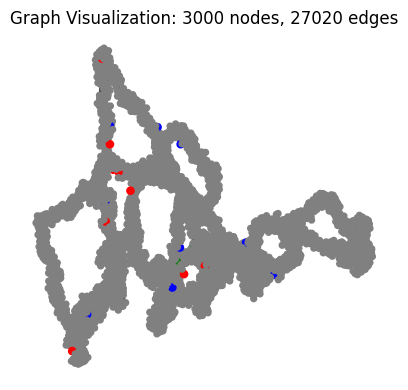

Generating Configurations:  67%|██████▋   | 40/60 [07:03<03:29, 10.46s/it]

[02:07:20.512][file_utils.py::read_yml_file] ✓ Success: Successfully loaded config from data/default_config.yml
[02:07:20.513][config_utils.py::recursive_update] ℹ Info: Key 'defaults' not found in original config. Adding with value: {'attacker_global': {'speed': 1, 'capture_radius': 2, 'sensors': ['map', 'agent', 'neighbor']}, 'defender_global': {'speed': 1, 'capture_radius': 1, 'sensors': ['map', 'agent', 'neighbor']}}
[02:07:20.513][config_utils.py::recursive_update] ℹ Info: Key 'visualization' not found in original config. Adding with value: {'window_size': [1980, 1080], 'game_speed': 2, 'draw_node_id': False, 'visualization_engine': 'PYGAME', 'colors': {'attacker_global': 'red', 'defender_global': 'blue', 'flag': 'green'}, 'sizes': {'flag_size': 10, 'global_agent_size': 10}}
[02:07:20.515][config_utils.py::generate_single_config] ✓ Success: Generated configuration: config_e49faf1bdf.yml
Renaming data/config/config_06060200_gds3k/F5A1D1_3b71e5/config_e49faf1bdf.yml to data/config/c

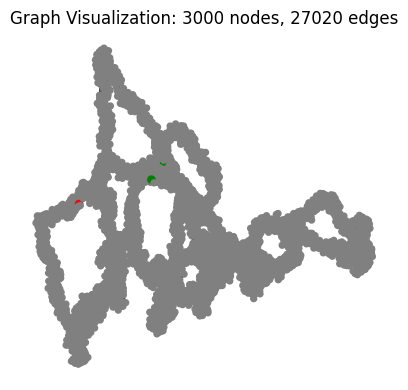

Generating Configurations:  68%|██████▊   | 41/60 [07:13<03:17, 10.38s/it]

[02:07:30.709][file_utils.py::read_yml_file] ✓ Success: Successfully loaded config from data/default_config.yml
[02:07:30.709][config_utils.py::recursive_update] ℹ Info: Key 'defaults' not found in original config. Adding with value: {'attacker_global': {'speed': 1, 'capture_radius': 2, 'sensors': ['map', 'agent', 'neighbor']}, 'defender_global': {'speed': 1, 'capture_radius': 1, 'sensors': ['map', 'agent', 'neighbor']}}
[02:07:30.710][config_utils.py::recursive_update] ℹ Info: Key 'visualization' not found in original config. Adding with value: {'window_size': [1980, 1080], 'game_speed': 2, 'draw_node_id': False, 'visualization_engine': 'PYGAME', 'colors': {'attacker_global': 'red', 'defender_global': 'blue', 'flag': 'green'}, 'sizes': {'flag_size': 10, 'global_agent_size': 10}}
[02:07:30.712][config_utils.py::generate_single_config] ✓ Success: Generated configuration: config_61bc236cb1.yml
Renaming data/config/config_06060200_gds3k/F5A1D1_3b71e5/config_61bc236cb1.yml to data/config/c

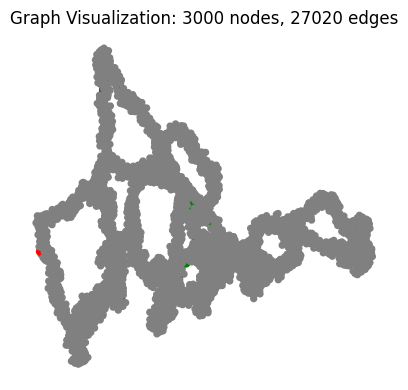

Generating Configurations:  70%|███████   | 42/60 [07:23<03:06, 10.37s/it]

[02:07:41.034][file_utils.py::read_yml_file] ✓ Success: Successfully loaded config from data/default_config.yml
[02:07:41.034][config_utils.py::recursive_update] ℹ Info: Key 'defaults' not found in original config. Adding with value: {'attacker_global': {'speed': 1, 'capture_radius': 2, 'sensors': ['map', 'agent', 'neighbor']}, 'defender_global': {'speed': 1, 'capture_radius': 1, 'sensors': ['map', 'agent', 'neighbor']}}
[02:07:41.034][config_utils.py::recursive_update] ℹ Info: Key 'visualization' not found in original config. Adding with value: {'window_size': [1980, 1080], 'game_speed': 2, 'draw_node_id': False, 'visualization_engine': 'PYGAME', 'colors': {'attacker_global': 'red', 'defender_global': 'blue', 'flag': 'green'}, 'sizes': {'flag_size': 10, 'global_agent_size': 10}}
[02:07:41.036][config_utils.py::generate_single_config] ✓ Success: Generated configuration: config_400b8136ea.yml
Renaming data/config/config_06060200_gds3k/F5A1D1_3b71e5/config_400b8136ea.yml to data/config/c

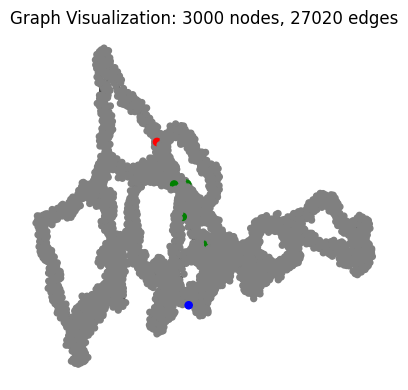

Generating Configurations:  72%|███████▏  | 43/60 [07:34<02:57, 10.43s/it]

[02:07:51.624][file_utils.py::read_yml_file] ✓ Success: Successfully loaded config from data/default_config.yml
[02:07:51.624][config_utils.py::recursive_update] ℹ Info: Key 'defaults' not found in original config. Adding with value: {'attacker_global': {'speed': 1, 'capture_radius': 2, 'sensors': ['map', 'agent', 'neighbor']}, 'defender_global': {'speed': 1, 'capture_radius': 1, 'sensors': ['map', 'agent', 'neighbor']}}
[02:07:51.625][config_utils.py::recursive_update] ℹ Info: Key 'visualization' not found in original config. Adding with value: {'window_size': [1980, 1080], 'game_speed': 2, 'draw_node_id': False, 'visualization_engine': 'PYGAME', 'colors': {'attacker_global': 'red', 'defender_global': 'blue', 'flag': 'green'}, 'sizes': {'flag_size': 10, 'global_agent_size': 10}}
[02:07:51.627][config_utils.py::generate_single_config] ✓ Success: Generated configuration: config_cf2dc936ec.yml
Renaming data/config/config_06060200_gds3k/F5A1D1_3b71e5/config_cf2dc936ec.yml to data/config/c

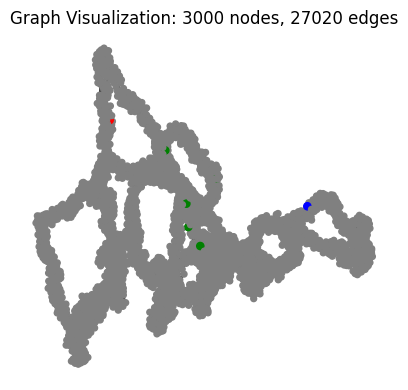

Generating Configurations:  73%|███████▎  | 44/60 [07:44<02:47, 10.44s/it]

[02:08:02.091][file_utils.py::read_yml_file] ✓ Success: Successfully loaded config from data/default_config.yml
[02:08:02.091][config_utils.py::recursive_update] ℹ Info: Key 'defaults' not found in original config. Adding with value: {'attacker_global': {'speed': 1, 'capture_radius': 2, 'sensors': ['map', 'agent', 'neighbor']}, 'defender_global': {'speed': 1, 'capture_radius': 1, 'sensors': ['map', 'agent', 'neighbor']}}
[02:08:02.092][config_utils.py::recursive_update] ℹ Info: Key 'visualization' not found in original config. Adding with value: {'window_size': [1980, 1080], 'game_speed': 2, 'draw_node_id': False, 'visualization_engine': 'PYGAME', 'colors': {'attacker_global': 'red', 'defender_global': 'blue', 'flag': 'green'}, 'sizes': {'flag_size': 10, 'global_agent_size': 10}}
[02:08:02.094][config_utils.py::generate_single_config] ✓ Success: Generated configuration: config_b4315f08a8.yml
Renaming data/config/config_06060200_gds3k/F5A1D1_3b71e5/config_b4315f08a8.yml to data/config/c

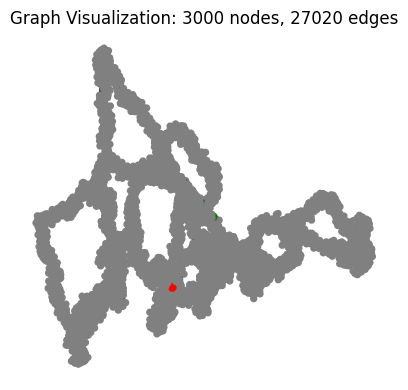

Generating Configurations:  75%|███████▌  | 45/60 [07:55<02:37, 10.50s/it]

[02:08:12.730][file_utils.py::read_yml_file] ✓ Success: Successfully loaded config from data/default_config.yml
[02:08:12.730][config_utils.py::recursive_update] ℹ Info: Key 'defaults' not found in original config. Adding with value: {'attacker_global': {'speed': 1, 'capture_radius': 2, 'sensors': ['map', 'agent', 'neighbor']}, 'defender_global': {'speed': 1, 'capture_radius': 1, 'sensors': ['map', 'agent', 'neighbor']}}
[02:08:12.730][config_utils.py::recursive_update] ℹ Info: Key 'visualization' not found in original config. Adding with value: {'window_size': [1980, 1080], 'game_speed': 2, 'draw_node_id': False, 'visualization_engine': 'PYGAME', 'colors': {'attacker_global': 'red', 'defender_global': 'blue', 'flag': 'green'}, 'sizes': {'flag_size': 10, 'global_agent_size': 10}}
[02:08:12.732][config_utils.py::generate_single_config] ✓ Success: Generated configuration: config_71d8ca34d6.yml
Renaming data/config/config_06060200_gds3k/F5A2D2_ddbec8/config_71d8ca34d6.yml to data/config/c

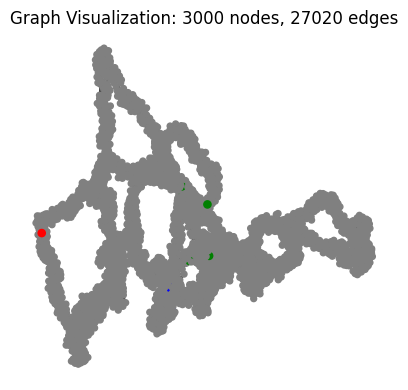

Generating Configurations:  77%|███████▋  | 46/60 [08:05<02:26, 10.46s/it]

[02:08:23.086][file_utils.py::read_yml_file] ✓ Success: Successfully loaded config from data/default_config.yml
[02:08:23.086][config_utils.py::recursive_update] ℹ Info: Key 'defaults' not found in original config. Adding with value: {'attacker_global': {'speed': 1, 'capture_radius': 2, 'sensors': ['map', 'agent', 'neighbor']}, 'defender_global': {'speed': 1, 'capture_radius': 1, 'sensors': ['map', 'agent', 'neighbor']}}
[02:08:23.086][config_utils.py::recursive_update] ℹ Info: Key 'visualization' not found in original config. Adding with value: {'window_size': [1980, 1080], 'game_speed': 2, 'draw_node_id': False, 'visualization_engine': 'PYGAME', 'colors': {'attacker_global': 'red', 'defender_global': 'blue', 'flag': 'green'}, 'sizes': {'flag_size': 10, 'global_agent_size': 10}}
[02:08:23.088][config_utils.py::generate_single_config] ✓ Success: Generated configuration: config_54a313d5e7.yml
Renaming data/config/config_06060200_gds3k/F5A2D2_ddbec8/config_54a313d5e7.yml to data/config/c

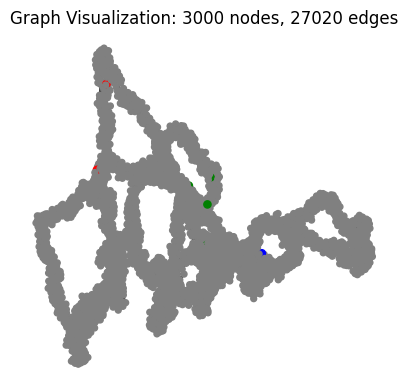

Generating Configurations:  78%|███████▊  | 47/60 [08:16<02:15, 10.39s/it]

[02:08:33.311][file_utils.py::read_yml_file] ✓ Success: Successfully loaded config from data/default_config.yml
[02:08:33.311][config_utils.py::recursive_update] ℹ Info: Key 'defaults' not found in original config. Adding with value: {'attacker_global': {'speed': 1, 'capture_radius': 2, 'sensors': ['map', 'agent', 'neighbor']}, 'defender_global': {'speed': 1, 'capture_radius': 1, 'sensors': ['map', 'agent', 'neighbor']}}
[02:08:33.311][config_utils.py::recursive_update] ℹ Info: Key 'visualization' not found in original config. Adding with value: {'window_size': [1980, 1080], 'game_speed': 2, 'draw_node_id': False, 'visualization_engine': 'PYGAME', 'colors': {'attacker_global': 'red', 'defender_global': 'blue', 'flag': 'green'}, 'sizes': {'flag_size': 10, 'global_agent_size': 10}}
[02:08:33.313][config_utils.py::generate_single_config] ✓ Success: Generated configuration: config_e8cca790e1.yml
Renaming data/config/config_06060200_gds3k/F5A2D2_ddbec8/config_e8cca790e1.yml to data/config/c

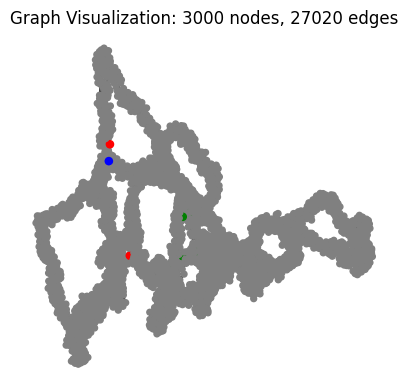

Generating Configurations:  80%|████████  | 48/60 [08:26<02:04, 10.37s/it]

[02:08:43.625][file_utils.py::read_yml_file] ✓ Success: Successfully loaded config from data/default_config.yml
[02:08:43.625][config_utils.py::recursive_update] ℹ Info: Key 'defaults' not found in original config. Adding with value: {'attacker_global': {'speed': 1, 'capture_radius': 2, 'sensors': ['map', 'agent', 'neighbor']}, 'defender_global': {'speed': 1, 'capture_radius': 1, 'sensors': ['map', 'agent', 'neighbor']}}
[02:08:43.626][config_utils.py::recursive_update] ℹ Info: Key 'visualization' not found in original config. Adding with value: {'window_size': [1980, 1080], 'game_speed': 2, 'draw_node_id': False, 'visualization_engine': 'PYGAME', 'colors': {'attacker_global': 'red', 'defender_global': 'blue', 'flag': 'green'}, 'sizes': {'flag_size': 10, 'global_agent_size': 10}}
[02:08:43.627][config_utils.py::generate_single_config] ✓ Success: Generated configuration: config_c0f41ace1d.yml
Renaming data/config/config_06060200_gds3k/F5A2D2_ddbec8/config_c0f41ace1d.yml to data/config/c

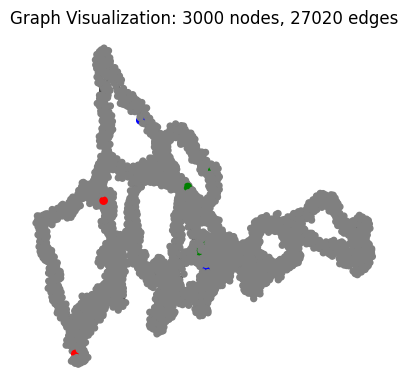

Generating Configurations:  82%|████████▏ | 49/60 [08:36<01:53, 10.34s/it]

[02:08:53.912][file_utils.py::read_yml_file] ✓ Success: Successfully loaded config from data/default_config.yml
[02:08:53.912][config_utils.py::recursive_update] ℹ Info: Key 'defaults' not found in original config. Adding with value: {'attacker_global': {'speed': 1, 'capture_radius': 2, 'sensors': ['map', 'agent', 'neighbor']}, 'defender_global': {'speed': 1, 'capture_radius': 1, 'sensors': ['map', 'agent', 'neighbor']}}
[02:08:53.912][config_utils.py::recursive_update] ℹ Info: Key 'visualization' not found in original config. Adding with value: {'window_size': [1980, 1080], 'game_speed': 2, 'draw_node_id': False, 'visualization_engine': 'PYGAME', 'colors': {'attacker_global': 'red', 'defender_global': 'blue', 'flag': 'green'}, 'sizes': {'flag_size': 10, 'global_agent_size': 10}}
[02:08:53.914][config_utils.py::generate_single_config] ✓ Success: Generated configuration: config_e596c19fb6.yml
Renaming data/config/config_06060200_gds3k/F5A2D2_ddbec8/config_e596c19fb6.yml to data/config/c

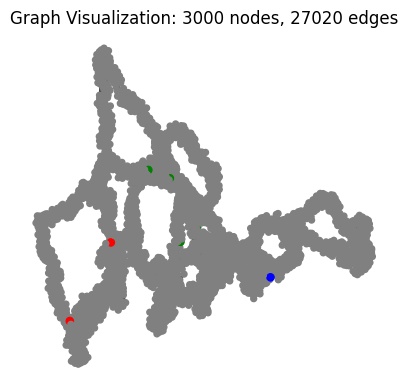

Generating Configurations:  83%|████████▎ | 50/60 [08:47<01:43, 10.38s/it]

[02:09:04.393][file_utils.py::read_yml_file] ✓ Success: Successfully loaded config from data/default_config.yml
[02:09:04.393][config_utils.py::recursive_update] ℹ Info: Key 'defaults' not found in original config. Adding with value: {'attacker_global': {'speed': 1, 'capture_radius': 2, 'sensors': ['map', 'agent', 'neighbor']}, 'defender_global': {'speed': 1, 'capture_radius': 1, 'sensors': ['map', 'agent', 'neighbor']}}
[02:09:04.394][config_utils.py::recursive_update] ℹ Info: Key 'visualization' not found in original config. Adding with value: {'window_size': [1980, 1080], 'game_speed': 2, 'draw_node_id': False, 'visualization_engine': 'PYGAME', 'colors': {'attacker_global': 'red', 'defender_global': 'blue', 'flag': 'green'}, 'sizes': {'flag_size': 10, 'global_agent_size': 10}}
[02:09:04.396][config_utils.py::generate_single_config] ✓ Success: Generated configuration: config_8d76311a68.yml
Renaming data/config/config_06060200_gds3k/F5A5D5_1eddac/config_8d76311a68.yml to data/config/c

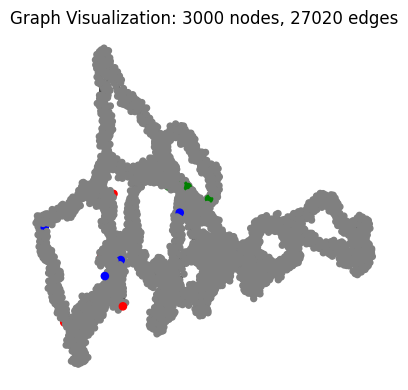

Generating Configurations:  85%|████████▌ | 51/60 [08:57<01:33, 10.40s/it]

[02:09:14.845][file_utils.py::read_yml_file] ✓ Success: Successfully loaded config from data/default_config.yml
[02:09:14.845][config_utils.py::recursive_update] ℹ Info: Key 'defaults' not found in original config. Adding with value: {'attacker_global': {'speed': 1, 'capture_radius': 2, 'sensors': ['map', 'agent', 'neighbor']}, 'defender_global': {'speed': 1, 'capture_radius': 1, 'sensors': ['map', 'agent', 'neighbor']}}
[02:09:14.845][config_utils.py::recursive_update] ℹ Info: Key 'visualization' not found in original config. Adding with value: {'window_size': [1980, 1080], 'game_speed': 2, 'draw_node_id': False, 'visualization_engine': 'PYGAME', 'colors': {'attacker_global': 'red', 'defender_global': 'blue', 'flag': 'green'}, 'sizes': {'flag_size': 10, 'global_agent_size': 10}}
[02:09:14.847][config_utils.py::generate_single_config] ✓ Success: Generated configuration: config_9399797231.yml
Renaming data/config/config_06060200_gds3k/F5A5D5_1eddac/config_9399797231.yml to data/config/c

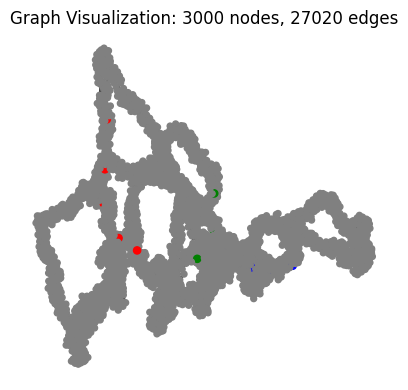

Generating Configurations:  87%|████████▋ | 52/60 [09:07<01:22, 10.31s/it]

[02:09:24.920][file_utils.py::read_yml_file] ✓ Success: Successfully loaded config from data/default_config.yml
[02:09:24.920][config_utils.py::recursive_update] ℹ Info: Key 'defaults' not found in original config. Adding with value: {'attacker_global': {'speed': 1, 'capture_radius': 2, 'sensors': ['map', 'agent', 'neighbor']}, 'defender_global': {'speed': 1, 'capture_radius': 1, 'sensors': ['map', 'agent', 'neighbor']}}
[02:09:24.920][config_utils.py::recursive_update] ℹ Info: Key 'visualization' not found in original config. Adding with value: {'window_size': [1980, 1080], 'game_speed': 2, 'draw_node_id': False, 'visualization_engine': 'PYGAME', 'colors': {'attacker_global': 'red', 'defender_global': 'blue', 'flag': 'green'}, 'sizes': {'flag_size': 10, 'global_agent_size': 10}}
[02:09:24.922][config_utils.py::generate_single_config] ✓ Success: Generated configuration: config_b0a1a97ff2.yml
Renaming data/config/config_06060200_gds3k/F5A5D5_1eddac/config_b0a1a97ff2.yml to data/config/c

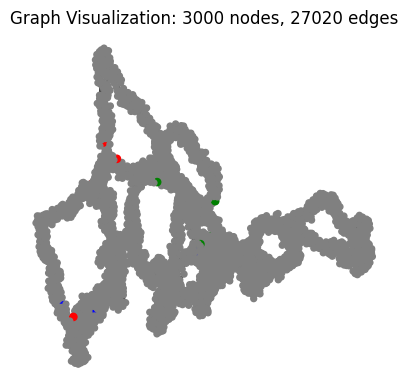

Generating Configurations:  88%|████████▊ | 53/60 [09:17<01:11, 10.21s/it]

[02:09:34.907][file_utils.py::read_yml_file] ✓ Success: Successfully loaded config from data/default_config.yml
[02:09:34.907][config_utils.py::recursive_update] ℹ Info: Key 'defaults' not found in original config. Adding with value: {'attacker_global': {'speed': 1, 'capture_radius': 2, 'sensors': ['map', 'agent', 'neighbor']}, 'defender_global': {'speed': 1, 'capture_radius': 1, 'sensors': ['map', 'agent', 'neighbor']}}
[02:09:34.907][config_utils.py::recursive_update] ℹ Info: Key 'visualization' not found in original config. Adding with value: {'window_size': [1980, 1080], 'game_speed': 2, 'draw_node_id': False, 'visualization_engine': 'PYGAME', 'colors': {'attacker_global': 'red', 'defender_global': 'blue', 'flag': 'green'}, 'sizes': {'flag_size': 10, 'global_agent_size': 10}}
[02:09:34.909][config_utils.py::generate_single_config] ✓ Success: Generated configuration: config_45ad80611d.yml
Renaming data/config/config_06060200_gds3k/F5A5D5_1eddac/config_45ad80611d.yml to data/config/c

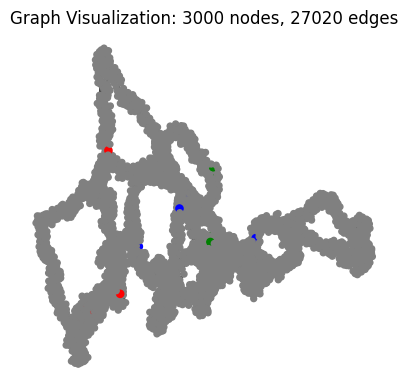

Generating Configurations:  90%|█████████ | 54/60 [09:27<01:01, 10.17s/it]

[02:09:45.001][file_utils.py::read_yml_file] ✓ Success: Successfully loaded config from data/default_config.yml
[02:09:45.001][config_utils.py::recursive_update] ℹ Info: Key 'defaults' not found in original config. Adding with value: {'attacker_global': {'speed': 1, 'capture_radius': 2, 'sensors': ['map', 'agent', 'neighbor']}, 'defender_global': {'speed': 1, 'capture_radius': 1, 'sensors': ['map', 'agent', 'neighbor']}}
[02:09:45.001][config_utils.py::recursive_update] ℹ Info: Key 'visualization' not found in original config. Adding with value: {'window_size': [1980, 1080], 'game_speed': 2, 'draw_node_id': False, 'visualization_engine': 'PYGAME', 'colors': {'attacker_global': 'red', 'defender_global': 'blue', 'flag': 'green'}, 'sizes': {'flag_size': 10, 'global_agent_size': 10}}
[02:09:45.003][config_utils.py::generate_single_config] ✓ Success: Generated configuration: config_0b746788ce.yml
Renaming data/config/config_06060200_gds3k/F5A5D5_1eddac/config_0b746788ce.yml to data/config/c

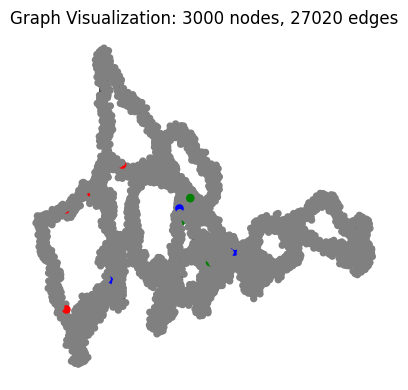

Generating Configurations:  92%|█████████▏| 55/60 [09:38<00:51, 10.30s/it]

[02:09:55.588][file_utils.py::read_yml_file] ✓ Success: Successfully loaded config from data/default_config.yml
[02:09:55.589][config_utils.py::recursive_update] ℹ Info: Key 'defaults' not found in original config. Adding with value: {'attacker_global': {'speed': 1, 'capture_radius': 2, 'sensors': ['map', 'agent', 'neighbor']}, 'defender_global': {'speed': 1, 'capture_radius': 1, 'sensors': ['map', 'agent', 'neighbor']}}
[02:09:55.589][config_utils.py::recursive_update] ℹ Info: Key 'visualization' not found in original config. Adding with value: {'window_size': [1980, 1080], 'game_speed': 2, 'draw_node_id': False, 'visualization_engine': 'PYGAME', 'colors': {'attacker_global': 'red', 'defender_global': 'blue', 'flag': 'green'}, 'sizes': {'flag_size': 10, 'global_agent_size': 10}}
[02:09:55.592][config_utils.py::generate_single_config] ✓ Success: Generated configuration: config_bb152f9550.yml
Renaming data/config/config_06060200_gds3k/F5A10D10_a43e34/config_bb152f9550.yml to data/config

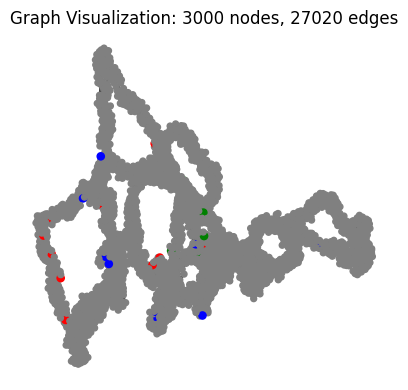

Generating Configurations:  93%|█████████▎| 56/60 [09:48<00:41, 10.32s/it]

[02:10:05.963][file_utils.py::read_yml_file] ✓ Success: Successfully loaded config from data/default_config.yml
[02:10:05.963][config_utils.py::recursive_update] ℹ Info: Key 'defaults' not found in original config. Adding with value: {'attacker_global': {'speed': 1, 'capture_radius': 2, 'sensors': ['map', 'agent', 'neighbor']}, 'defender_global': {'speed': 1, 'capture_radius': 1, 'sensors': ['map', 'agent', 'neighbor']}}
[02:10:05.963][config_utils.py::recursive_update] ℹ Info: Key 'visualization' not found in original config. Adding with value: {'window_size': [1980, 1080], 'game_speed': 2, 'draw_node_id': False, 'visualization_engine': 'PYGAME', 'colors': {'attacker_global': 'red', 'defender_global': 'blue', 'flag': 'green'}, 'sizes': {'flag_size': 10, 'global_agent_size': 10}}
[02:10:05.966][config_utils.py::generate_single_config] ✓ Success: Generated configuration: config_c063dd492f.yml
Renaming data/config/config_06060200_gds3k/F5A10D10_a43e34/config_c063dd492f.yml to data/config

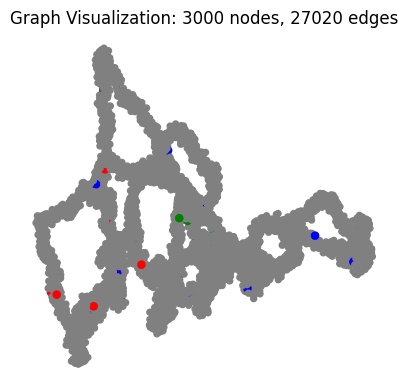

Generating Configurations:  95%|█████████▌| 57/60 [09:59<00:31, 10.37s/it]

[02:10:16.451][file_utils.py::read_yml_file] ✓ Success: Successfully loaded config from data/default_config.yml
[02:10:16.451][config_utils.py::recursive_update] ℹ Info: Key 'defaults' not found in original config. Adding with value: {'attacker_global': {'speed': 1, 'capture_radius': 2, 'sensors': ['map', 'agent', 'neighbor']}, 'defender_global': {'speed': 1, 'capture_radius': 1, 'sensors': ['map', 'agent', 'neighbor']}}
[02:10:16.451][config_utils.py::recursive_update] ℹ Info: Key 'visualization' not found in original config. Adding with value: {'window_size': [1980, 1080], 'game_speed': 2, 'draw_node_id': False, 'visualization_engine': 'PYGAME', 'colors': {'attacker_global': 'red', 'defender_global': 'blue', 'flag': 'green'}, 'sizes': {'flag_size': 10, 'global_agent_size': 10}}
[02:10:16.454][config_utils.py::generate_single_config] ✓ Success: Generated configuration: config_5fdeeaa483.yml
Renaming data/config/config_06060200_gds3k/F5A10D10_a43e34/config_5fdeeaa483.yml to data/config

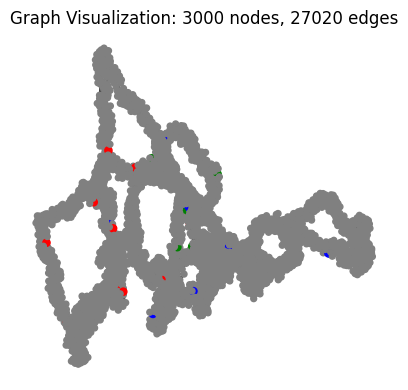

Generating Configurations:  97%|█████████▋| 58/60 [10:09<00:20, 10.40s/it]

[02:10:26.919][file_utils.py::read_yml_file] ✓ Success: Successfully loaded config from data/default_config.yml
[02:10:26.919][config_utils.py::recursive_update] ℹ Info: Key 'defaults' not found in original config. Adding with value: {'attacker_global': {'speed': 1, 'capture_radius': 2, 'sensors': ['map', 'agent', 'neighbor']}, 'defender_global': {'speed': 1, 'capture_radius': 1, 'sensors': ['map', 'agent', 'neighbor']}}
[02:10:26.919][config_utils.py::recursive_update] ℹ Info: Key 'visualization' not found in original config. Adding with value: {'window_size': [1980, 1080], 'game_speed': 2, 'draw_node_id': False, 'visualization_engine': 'PYGAME', 'colors': {'attacker_global': 'red', 'defender_global': 'blue', 'flag': 'green'}, 'sizes': {'flag_size': 10, 'global_agent_size': 10}}
[02:10:26.922][config_utils.py::generate_single_config] ✓ Success: Generated configuration: config_6e1022185f.yml
Renaming data/config/config_06060200_gds3k/F5A10D10_a43e34/config_6e1022185f.yml to data/config

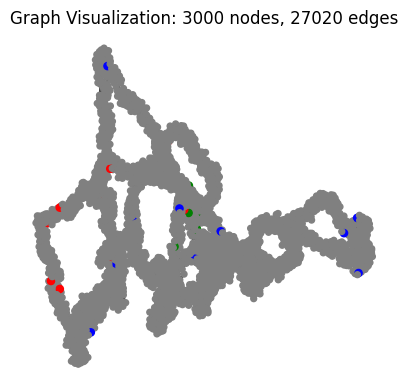

Generating Configurations:  98%|█████████▊| 59/60 [10:20<00:10, 10.40s/it]

[02:10:37.308][file_utils.py::read_yml_file] ✓ Success: Successfully loaded config from data/default_config.yml
[02:10:37.308][config_utils.py::recursive_update] ℹ Info: Key 'defaults' not found in original config. Adding with value: {'attacker_global': {'speed': 1, 'capture_radius': 2, 'sensors': ['map', 'agent', 'neighbor']}, 'defender_global': {'speed': 1, 'capture_radius': 1, 'sensors': ['map', 'agent', 'neighbor']}}
[02:10:37.309][config_utils.py::recursive_update] ℹ Info: Key 'visualization' not found in original config. Adding with value: {'window_size': [1980, 1080], 'game_speed': 2, 'draw_node_id': False, 'visualization_engine': 'PYGAME', 'colors': {'attacker_global': 'red', 'defender_global': 'blue', 'flag': 'green'}, 'sizes': {'flag_size': 10, 'global_agent_size': 10}}
[02:10:37.312][config_utils.py::generate_single_config] ✓ Success: Generated configuration: config_3438d83638.yml
Renaming data/config/config_06060200_gds3k/F5A10D10_a43e34/config_3438d83638.yml to data/config

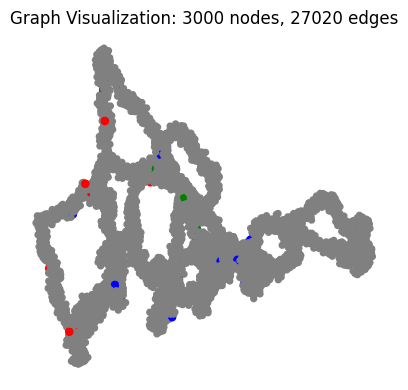

Generating Configurations: 100%|██████████| 60/60 [10:30<00:00, 10.51s/it]

[02:10:47.720][2353347673.py::<module>] ℹ Info: Generated 60 configuration files in data/config/config_06060200_gds3k


In [4]:
# Pre-unroll distributions to avoid extra nesting:
flag_dist_items = [(dist_type, param) for dist_type, params in FLAG_DISTRIBUTION.items() for param in params]
attacker_dist_items = [(dist_type, param) for dist_type, params in ATTACKER_DISTRIBUTION.items() for param in params]
defender_dist_items = [(dist_type, param) for dist_type, params in DEFENDER_DISTRIBUTION.items() for param in params]

config_count = 0
pbar = tqdm(total=total_iterations, desc="Generating Configurations")

# Iterate over all parameter combinations using itertools.product:
for (graph_file, graph), flag_num, (flag_dist_type, flag_param), (attacker_num, defender_num), (attacker_dist_type, attacker_param), (defender_dist_type, defender_param) in itertools.product(
    loaded_graphs.items(), FLAG_NUMBER, flag_dist_items, AGENT_NUMBER, attacker_dist_items, defender_dist_items
):

    # Skip if either attacker or defender count is less than the flag number.
    # if attacker_num < flag_num or defender_num < flag_num:
    #     pbar.update(REPEAT)
    #     continue

    # Generate a subfolder name based on parameters
    # Try to generate a parameter signature once to get the hash key
    dummy_result, hash_key = CONUTL.generate_config_parameters(
        graph_file=graph_file,
        game_rule=GAME_RULE,
        flag_num=flag_num,
        flag_dist_type=flag_dist_type,
        flag_param=flag_param,
        center_node_flag=ATTACKER_DISTRIBUTION_CENTER,
        flag_positions=[0],  # Dummy value
        attacker_num=attacker_num,
        attacker_dist_type=attacker_dist_type,
        attacker_param=attacker_param,
        center_node_attacker=ATTACKER_DISTRIBUTION_CENTER,
        attacker_positions=[0],  # Dummy value
        defender_num=defender_num,
        defender_dist_type=defender_dist_type,
        defender_param=defender_param,
        center_node_defender=DEFENDER_DISTRIBUTION_CENTER,
        defender_positions=[0],  # Dummy value
    )

    # Create parameter subfolder path
    param_folder_name = f"F{flag_num}A{attacker_num}D{defender_num}_{hash_key[:6]}"
    param_subfolder = os.path.join(OUTPUT_DIR_BASE, param_folder_name)
    image_subfolder = os.path.join(IMAGE_DIR_BASE, param_folder_name)

    # Create the parameter subfolder if it doesn't exist
    os.makedirs(param_subfolder, exist_ok=True)
    os.makedirs(image_subfolder, exist_ok=True)

    # Repeat the configuration generation REPEAT times for each valid combination.
    for repeat_idx in range(REPEAT):
        success_flag, file_name = CONUTL.generate_single_config(
            graph=graph,
            graph_file=graph_file,
            flag_num=flag_num,
            flag_dist_type=flag_dist_type,
            flag_param=flag_param,
            attacker_num=attacker_num,
            defender_num=defender_num,
            attacker_dist_type=attacker_dist_type,
            attacker_param=attacker_param,
            defender_dist_type=defender_dist_type,
            defender_param=defender_param,
            game_rule=GAME_RULE,
            output_dir=param_subfolder,  # Use parameter subfolder
            default_config_path=DEFAULT_CONFIG_DIR,
            debug=True,
            center_node_flag=FLAG_DISTRIBUTION_CENTER,
            center_node_attacker=ATTACKER_DISTRIBUTION_CENTER,
            center_node_defender=DEFENDER_DISTRIBUTION_CENTER,
        )

        if success_flag:
            # Rename the file to include the repeat index
            original_path = os.path.join(param_subfolder, file_name)
            # Extract the hash part from the filename
            hash_part = file_name.replace("config_", "").replace(".yml", "")
            # Create a new name with repeat index
            new_file_name = f"{param_folder_name}_r{repeat_idx:02d}.yml"
            new_path = os.path.join(param_subfolder, new_file_name)
            print(f"Renaming {original_path} to {new_path}")

            # Rename the file
            os.rename(original_path, new_path)

            config_count += 1

            # Generate image with the same naming convention
            base, _ = os.path.splitext(new_file_name)
            image_name = base + ".png"
            quick_vis = GRVIS.GraphVisualizer(file_path=new_path, mode="quick")
            quick_vis.visualize(save_path=os.path.join(image_subfolder, image_name))
        else:
            error(f"Failed to generate configuration at iteration {config_count}, repeat {repeat_idx}")

        pbar.update(1)


pbar.close()
info(f"Generated {config_count} configuration files in {OUTPUT_DIR_BASE}")